In [ ]:
# ============================================================================
# Part 1: Data Loading and Initial Inspection
# ============================================================================

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("="*80)
print("HEALTHCARE PROVIDER FRAUD DETECTION")
print("Data Exploration and Feature Engineering")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 1.1 Load All Datasets
# ----------------------------------------------------------------------------
print("STEP 1: LOADING DATASETS")
print("-"*80)

# Load Beneficiary Data
beneficiary_df = pd.read_csv('Train_Beneficiarydata.csv')
print("✓ Beneficiary data loaded")

# Load Inpatient Data
inpatient_df = pd.read_csv('Train_Inpatientdata.csv')
print("✓ Inpatient data loaded")

# Load Outpatient Data
outpatient_df = pd.read_csv('Train_Outpatientdata.csv')
print("✓ Outpatient data loaded")

# Load Labels
labels_df = pd.read_csv('Train_labels.csv')
print("✓ Labels data loaded")

print("\nAll datasets loaded successfully.\n")

HEALTHCARE PROVIDER FRAUD DETECTION
Data Exploration and Feature Engineering


STEP 1: LOADING DATASETS
--------------------------------------------------------------------------------
✓ Beneficiary data loaded
✓ Inpatient data loaded
✓ Outpatient data loaded
✓ Labels data loaded

All datasets loaded successfully.



In [ ]:
# ============================================================================
# Part 2: Understanding Dataset Structure and Relationships
# ============================================================================

print("="*80)
print("STEP 2: DATASET STRUCTURE AND RELATIONSHIPS")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 2.1 Basic Dataset Information
# ----------------------------------------------------------------------------

print("2.1 BASIC DATASET INFORMATION")
print("-"*80)
print("\n")

datasets = {
    'Beneficiary': beneficiary_df,
    'Inpatient': inpatient_df,
    'Outpatient': outpatient_df,
    'Labels': labels_df
}

for name, df in datasets.items():
    print(f"{name} Dataset:")
    print(f"  Shape: {df.shape} ({df.shape[0]:,} rows × {df.shape[1]} columns)")
    print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print()

# ----------------------------------------------------------------------------
# 2.2 Identify Key Identifiers and Relationships
# ----------------------------------------------------------------------------

print("\n2.2 KEY IDENTIFIERS AND DATASET RELATIONSHIPS")
print("-"*80)
print("\n")

print("Primary Keys and Linking Structure:")
print()

# BeneID - Patient Identifier
print("1. BeneID (Beneficiary/Patient Identifier):")
print(f"   - Unique beneficiaries in Beneficiary data: {beneficiary_df['BeneID'].nunique():,}")
print(f"   - Unique beneficiaries in Inpatient claims: {inpatient_df['BeneID'].nunique():,}")
print(f"   - Unique beneficiaries in Outpatient claims: {outpatient_df['BeneID'].nunique():,}")
print(f"   - Purpose: Links patient demographics and chronic conditions to their claims")
print()

# Provider - Healthcare Provider Identifier
print("2. Provider (Healthcare Provider Identifier):")
print(f"   - Unique providers in Inpatient claims: {inpatient_df['Provider'].nunique():,}")
print(f"   - Unique providers in Outpatient claims: {outpatient_df['Provider'].nunique():,}")
print(f"   - Unique providers with fraud labels: {labels_df['Provider'].nunique():,}")
print(f"   - Purpose: Links claims to providers and connects to fraud labels (TARGET)")
print()

# ClaimID - Claim Identifier
print("3. ClaimID (Individual Claim Identifier):")
print(f"   - Unique Inpatient claims: {inpatient_df['ClaimID'].nunique():,}")
print(f"   - Unique Outpatient claims: {outpatient_df['ClaimID'].nunique():,}")
print(f"   - Purpose: Uniquely identifies each medical claim transaction")
print()

# Check for overlapping providers
inpatient_providers = set(inpatient_df['Provider'].unique())
outpatient_providers = set(outpatient_df['Provider'].unique())
labeled_providers = set(labels_df['Provider'].unique())

overlap_in_out = inpatient_providers.intersection(outpatient_providers)
providers_in_both = len(overlap_in_out)

print("\nProvider Distribution Across Data Sources:")
print(f"   - Providers in BOTH Inpatient and Outpatient: {providers_in_both:,}")
print(f"   - Providers ONLY in Inpatient: {len(inpatient_providers - outpatient_providers):,}")
print(f"   - Providers ONLY in Outpatient: {len(outpatient_providers - inpatient_providers):,}")
print(f"   - Total unique providers in claims data: {len(inpatient_providers.union(outpatient_providers)):,}")

STEP 2: DATASET STRUCTURE AND RELATIONSHIPS


2.1 BASIC DATASET INFORMATION
--------------------------------------------------------------------------------


Beneficiary Dataset:
  Shape: (138556, 25) (138,556 rows × 25 columns)
  Memory Usage: 48.58 MB

Inpatient Dataset:
  Shape: (40474, 30) (40,474 rows × 30 columns)
  Memory Usage: 46.77 MB

Outpatient Dataset:
  Shape: (517737, 27) (517,737 rows × 27 columns)
  Memory Usage: 446.45 MB

Labels Dataset:
  Shape: (5410, 2) (5,410 rows × 2 columns)
  Memory Usage: 0.56 MB


2.2 KEY IDENTIFIERS AND DATASET RELATIONSHIPS
--------------------------------------------------------------------------------


Primary Keys and Linking Structure:

1. BeneID (Beneficiary/Patient Identifier):
   - Unique beneficiaries in Beneficiary data: 138,556
   - Unique beneficiaries in Inpatient claims: 31,289
   - Unique beneficiaries in Outpatient claims: 133,980
   - Purpose: Links patient demographics and chronic conditions to their claims

2. Provider 

In [ ]:
# ============================================================================
# Part 3: Data Quality Assessment
# ============================================================================

print("\n" + "="*80)
print("STEP 3: DATA QUALITY ASSESSMENT")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 3.1 Missing Values Analysis
# ----------------------------------------------------------------------------

print("3.1 MISSING VALUES ANALYSIS")
print("-"*80)
print("\n")

def analyze_missing_values(df, dataset_name):
    """Analyze and display missing value statistics for a dataset"""
    print(f"{dataset_name} Dataset:")

    missing_stats = pd.DataFrame({
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
    })

    missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )

    if len(missing_stats) == 0:
        print("   ✓ No missing values detected")
    else:
        print(f"   Columns with missing values: {len(missing_stats)}")
        print()
        for col, row in missing_stats.iterrows():
            print(f"   - {col}: {row['Missing_Count']:,} ({row['Missing_Percentage']:.2f}%)")

    print()

# Analyze each dataset
analyze_missing_values(beneficiary_df, "Beneficiary")
analyze_missing_values(inpatient_df, "Inpatient")
analyze_missing_values(outpatient_df, "Outpatient")
analyze_missing_values(labels_df, "Labels")

# ----------------------------------------------------------------------------
# 3.2 Data Type Assessment
# ----------------------------------------------------------------------------

print("\n3.2 DATA TYPE ASSESSMENT")
print("-"*80)
print("\n")

for name, df in datasets.items():
    print(f"{name} Dataset:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   - {dtype}: {count} columns")
    print()

# ----------------------------------------------------------------------------
# 3.3 Duplicate Records Check
# ----------------------------------------------------------------------------

print("\n3.3 DUPLICATE RECORDS CHECK")
print("-"*80)
print("\n")

print(f"Beneficiary Data:")
print(f"   - Duplicate BeneID: {beneficiary_df['BeneID'].duplicated().sum()}")
print()

print(f"Inpatient Data:")
print(f"   - Duplicate ClaimID: {inpatient_df['ClaimID'].duplicated().sum()}")
print()

print(f"Outpatient Data:")
print(f"   - Duplicate ClaimID: {outpatient_df['ClaimID'].duplicated().sum()}")
print()

print(f"Labels Data:")
print(f"   - Duplicate Provider: {labels_df['Provider'].duplicated().sum()}")




STEP 3: DATA QUALITY ASSESSMENT


3.1 MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------


Beneficiary Dataset:
   Columns with missing values: 1

   - DOD: 137,135.0 (98.97%)

Inpatient Dataset:
   Columns with missing values: 19

   - ClmProcedureCode_6: 40,474.0 (100.00%)
   - ClmProcedureCode_5: 40,465.0 (99.98%)
   - ClmProcedureCode_4: 40,358.0 (99.71%)
   - ClmProcedureCode_3: 39,509.0 (97.62%)
   - ClmDiagnosisCode_10: 36,547.0 (90.30%)
   - OtherPhysician: 35,784.0 (88.41%)
   - ClmProcedureCode_2: 35,020.0 (86.52%)
   - ClmProcedureCode_1: 17,326.0 (42.81%)
   - OperatingPhysician: 16,644.0 (41.12%)
   - ClmDiagnosisCode_9: 13,497.0 (33.35%)
   - ClmDiagnosisCode_8: 9,942.0 (24.56%)
   - ClmDiagnosisCode_7: 7,258.0 (17.93%)
   - ClmDiagnosisCode_6: 4,838.0 (11.95%)
   - ClmDiagnosisCode_5: 2,894.0 (7.15%)
   - ClmDiagnosisCode_4: 1,534.0 (3.79%)
   - DeductibleAmtPaid: 899.0 (2.22%)
   - ClmDiagnosisCode_3: 676.0 (1.67%)


In [ ]:
# ----------------------------------------------------------------------------
# 3.4 Data Inconsistencies and Validation
# ----------------------------------------------------------------------------

print("\n3.4 DATA INCONSISTENCIES AND VALIDATION")
print("-"*80)
print("\n")

# Check for negative values in financial columns
print("Financial Values Validation:")
print()

print("Beneficiary Reimbursement Amounts:")
for col in ['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']:
    if col in beneficiary_df.columns:
        neg_count = (beneficiary_df[col] < 0).sum()
        print(f"   - {col}: {neg_count} negative values")

print()
print("Inpatient Claim Amounts:")
inpatient_df['InscClaimAmtReimbursed'] = pd.to_numeric(inpatient_df['InscClaimAmtReimbursed'], errors='coerce')
inpatient_df['DeductibleAmtPaid'] = pd.to_numeric(inpatient_df['DeductibleAmtPaid'], errors='coerce')
print(f"   - InscClaimAmtReimbursed: {(inpatient_df['InscClaimAmtReimbursed'] < 0).sum()} negative values")
print(f"   - DeductibleAmtPaid: {(inpatient_df['DeductibleAmtPaid'] < 0).sum()} negative values")

print()
print("Outpatient Claim Amounts:")
outpatient_df['InscClaimAmtReimbursed'] = pd.to_numeric(outpatient_df['InscClaimAmtReimbursed'], errors='coerce')
outpatient_df['DeductibleAmtPaid'] = pd.to_numeric(outpatient_df['DeductibleAmtPaid'], errors='coerce')
print(f"   - InscClaimAmtReimbursed: {(outpatient_df['InscClaimAmtReimbursed'] < 0).sum()} negative values")
print(f"   - DeductibleAmtPaid: {(outpatient_df['DeductibleAmtPaid'] < 0).sum()} negative values")

print()
print("-"*60)

# Validate categorical values
print("\nCategorical Values Validation:")
print()

print("Gender Distribution:")
print(beneficiary_df['Gender'].value_counts().sort_index())

print()
print("Race Distribution:")
print(beneficiary_df['Race'].value_counts().sort_index())

print()
print("Renal Disease Indicator:")
print(beneficiary_df['RenalDiseaseIndicator'].value_counts())

print()
print("Fraud Labels:")
print(labels_df['PotentialFraud'].value_counts())

print()
print("-"*60)

# Validate coverage months
print("\nCoverage Months Validation:")
print(f"   - PartA Coverage: Min={beneficiary_df['NoOfMonths_PartACov'].min()}, Max={beneficiary_df['NoOfMonths_PartACov'].max()}")
print(f"   - PartB Coverage: Min={beneficiary_df['NoOfMonths_PartBCov'].min()}, Max={beneficiary_df['NoOfMonths_PartBCov'].max()}")

invalid_parta = ((beneficiary_df['NoOfMonths_PartACov'] < 0) | (beneficiary_df['NoOfMonths_PartACov'] > 12)).sum()
invalid_partb = ((beneficiary_df['NoOfMonths_PartBCov'] < 0) | (beneficiary_df['NoOfMonths_PartBCov'] > 12)).sum()

print()
print(f"Invalid coverage months (outside 0-12 range):")
print(f"   - PartA: {invalid_parta}")
print(f"   - PartB: {invalid_partb}")

print()
print("-"*60)

# Validate chronic conditions encoding
print("\nChronic Conditions Encoding:")
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond_' in col]
print(f"   - Number of chronic condition columns: {len(chronic_cols)}")
print()

# Check unique values
sample_chronic = chronic_cols[0]
unique_vals = sorted(beneficiary_df[sample_chronic].unique())
print(f"Unique values in chronic conditions: {unique_vals}")
print("   Note: 1 = condition present, 2 = condition absent")

# ----------------------------------------------------------------------------
# 3.5 Data Quality Summary
# ----------------------------------------------------------------------------

print("\n\n3.5 DATA QUALITY SUMMARY")
print("-"*80)
print("\n")

print("Quality Assessment Results:")
print()

print("✓ STRENGTHS:")
print("   - No duplicate records in any dataset")
print("   - No invalid coverage months")
print("   - No negative claim amounts")
print("   - Consistent categorical encodings")
print("   - Clean primary/foreign key relationships")
print()

print("⚠ MINOR ISSUES:")
print("   - 27 negative values in beneficiary annual reimbursement amounts")
print("     (15 inpatient, 12 outpatient - likely data entry errors or refunds)")
print("   - High missingness in diagnosis/procedure codes")
print("     (Expected - not all claims require all diagnostic codes)")
print("   - 98.97% missing DOD values")
print("     (Expected - indicates 98.97% of beneficiaries are alive)")
print()

print("📋 DATA CLEANING ACTIONS:")
print("   1. Convert date columns from object to datetime")
print("   2. Handle missing diagnosis/procedure codes (keep as-is or encode as 'None')")
print("   3. Consider capping or removing negative reimbursement values")
print("   4. DOD missing values can be treated as 'alive' status")
print()

print("Overall Data Quality: HIGH")
print("   - Critical fields have no missing values")
print("   - Data types are appropriate")
print("   - Relationships are consistent")
print("   - Ready for feature engineering")

print("\n")
print("="*80)
print("Part 3 Complete! Ready for Target Variable Analysis.")
print("="*80)


3.4 DATA INCONSISTENCIES AND VALIDATION
--------------------------------------------------------------------------------


Financial Values Validation:

Beneficiary Reimbursement Amounts:
   - IPAnnualReimbursementAmt: 15 negative values
   - IPAnnualDeductibleAmt: 0 negative values
   - OPAnnualReimbursementAmt: 12 negative values
   - OPAnnualDeductibleAmt: 0 negative values

Inpatient Claim Amounts:
   - InscClaimAmtReimbursed: 0 negative values
   - DeductibleAmtPaid: 0 negative values

Outpatient Claim Amounts:
   - InscClaimAmtReimbursed: 0 negative values
   - DeductibleAmtPaid: 0 negative values

------------------------------------------------------------

Categorical Values Validation:

Gender Distribution:
Gender
1    59450
2    79106
Name: count, dtype: int64

Race Distribution:
Race
1    117057
2     13538
3      5059
5      2902
Name: count, dtype: int64

Renal Disease Indicator:
RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

Fraud Labels:
Poten

In [ ]:
# ============================================================================
# Part 4: Target Variable Analysis
# ============================================================================

print("\n" + "="*80)
print("STEP 4: TARGET VARIABLE ANALYSIS (FRAUD LABELS)")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 4.1 Fraud Distribution
# ----------------------------------------------------------------------------

print("4.1 FRAUD LABEL DISTRIBUTION")
print("-"*80)
print("\n")

fraud_counts = labels_df['PotentialFraud'].value_counts()
fraud_percentages = labels_df['PotentialFraud'].value_counts(normalize=True) * 100

print("Provider Fraud Status:")
for label in ['No', 'Yes']:
    if label in fraud_counts.index:
        print(f"   - {label} (Fraudulent={label=='Yes'}): {fraud_counts[label]:,} providers ({fraud_percentages[label]:.2f}%)")

print()
print(f"Class Imbalance Ratio: 1:{(fraud_counts['No']/fraud_counts['Yes']):.1f}")
print(f"   (For every 1 fraudulent provider, there are ~{int(fraud_counts['No']/fraud_counts['Yes'])} legitimate providers)")


STEP 4: TARGET VARIABLE ANALYSIS (FRAUD LABELS)


4.1 FRAUD LABEL DISTRIBUTION
--------------------------------------------------------------------------------


Provider Fraud Status:
   - No (Fraudulent=False): 4,904 providers (90.65%)
   - Yes (Fraudulent=True): 506 providers (9.35%)

Class Imbalance Ratio: 1:9.7
   (For every 1 fraudulent provider, there are ~9 legitimate providers)


In [ ]:
# ============================================================================
# Part 5: Detailed Column Examination
# ============================================================================

print("\n" + "="*80)
print("STEP 5: DETAILED COLUMN EXAMINATION")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 5.1 Beneficiary Data Columns
# ----------------------------------------------------------------------------

print("5.1 BENEFICIARY DATA COLUMNS")
print("-"*80)
print("\n")

print(f"Total Columns: {len(beneficiary_df.columns)}")
print("\nColumn Categories:")
print()

print("Demographic Information:")
demo_cols = ['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'State', 'County']
for col in demo_cols:
    if col in beneficiary_df.columns:
        print(f"   - {col}")
print()

print("Coverage Information:")
coverage_cols = ['NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'RenalDiseaseIndicator']
for col in coverage_cols:
    if col in beneficiary_df.columns:
        print(f"   - {col}")
print()

print("Chronic Conditions (11 conditions):")
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond_' in col]
for col in chronic_cols:
    print(f"   - {col}")
print()

print("Financial Information:")
financial_cols = ['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                  'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']
for col in financial_cols:
    if col in beneficiary_df.columns:
        print(f"   - {col}")

# ----------------------------------------------------------------------------
# 5.2 Inpatient Data Columns
# ----------------------------------------------------------------------------

print("\n\n5.2 INPATIENT DATA COLUMNS")
print("-"*80)
print("\n")

print(f"Total Columns: {len(inpatient_df.columns)}")
print("\nColumn Categories:")
print()

print("Identifiers:")
id_cols = ['BeneID', 'ClaimID', 'Provider']
for col in id_cols:
    if col in inpatient_df.columns:
        print(f"   - {col}")
print()

print("Date Information:")
date_cols = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']
for col in date_cols:
    if col in inpatient_df.columns:
        print(f"   - {col}")
print()

print("Financial Information:")
fin_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid']
for col in fin_cols:
    if col in inpatient_df.columns:
        print(f"   - {col}")
print()

print("Medical Personnel:")
physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
for col in physician_cols:
    if col in inpatient_df.columns:
        print(f"   - {col}")
print()

diag_cols = [col for col in inpatient_df.columns if 'DiagnosisCode' in col]
print(f"Diagnosis Codes: {len(diag_cols)} columns")
print(f"   - ClmAdmitDiagnosisCode")
print(f"   - ClmDiagnosisCode_1 through ClmDiagnosisCode_10")
print(f"   - DiagnosisGroupCode")
print()

proc_cols = [col for col in inpatient_df.columns if 'ProcedureCode' in col]
print(f"Procedure Codes: {len(proc_cols)} columns")
print(f"   - ClmProcedureCode_1 through ClmProcedureCode_6")

# ----------------------------------------------------------------------------
# 5.3 Outpatient Data Columns
# ----------------------------------------------------------------------------

print("\n\n5.3 OUTPATIENT DATA COLUMNS")
print("-"*80)
print("\n")

print(f"Total Columns: {len(outpatient_df.columns)}")
print("\nColumn Categories:")
print()

print("Key Differences from Inpatient:")
print("   - No AdmissionDt or DischargeDt (outpatient visits)")
print("   - No DiagnosisGroupCode")
print("   - Same structure for diagnosis and procedure codes")
print()

print(f"Diagnosis Codes: {len([col for col in outpatient_df.columns if 'DiagnosisCode' in col])} columns")
print(f"Procedure Codes: {len([col for col in outpatient_df.columns if 'ProcedureCode' in col])} columns")


STEP 5: DETAILED COLUMN EXAMINATION


5.1 BENEFICIARY DATA COLUMNS
--------------------------------------------------------------------------------


Total Columns: 25

Column Categories:

Demographic Information:
   - BeneID
   - DOB
   - DOD
   - Gender
   - Race
   - State
   - County

Coverage Information:
   - NoOfMonths_PartACov
   - NoOfMonths_PartBCov
   - RenalDiseaseIndicator

Chronic Conditions (11 conditions):
   - ChronicCond_Alzheimer
   - ChronicCond_Heartfailure
   - ChronicCond_KidneyDisease
   - ChronicCond_Cancer
   - ChronicCond_ObstrPulmonary
   - ChronicCond_Depression
   - ChronicCond_Diabetes
   - ChronicCond_IschemicHeart
   - ChronicCond_Osteoporasis
   - ChronicCond_rheumatoidarthritis
   - ChronicCond_stroke

Financial Information:
   - IPAnnualReimbursementAmt
   - IPAnnualDeductibleAmt
   - OPAnnualReimbursementAmt
   - OPAnnualDeductibleAmt


5.2 INPATIENT DATA COLUMNS
--------------------------------------------------------------------------------


Tot

In [ ]:
# ============================================================================
# Part 6: Sample Data Inspection
# ============================================================================

print("\n" + "="*80)
print("STEP 6: SAMPLE DATA INSPECTION")
print("="*80)
print("\n")

print("Displaying first 3 rows of each dataset for structure understanding:\n")

print("="*80)
print("BENEFICIARY DATA (Sample)")
print("="*80)
display(beneficiary_df.head(3))

print("\n" + "="*80)
print("INPATIENT CLAIMS DATA (Sample)")
print("="*80)
display(inpatient_df.head(3))

print("\n" + "="*80)
print("OUTPATIENT CLAIMS DATA (Sample)")
print("="*80)
display(outpatient_df.head(3))

print("\n" + "="*80)
print("FRAUD LABELS DATA (Sample)")
print("="*80)
display(labels_df.head(3))


STEP 6: SAMPLE DATA INSPECTION


Displaying first 3 rows of each dataset for structure understanding:

BENEFICIARY DATA (Sample)


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40



INPATIENT CLAIMS DATA (Sample)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



OUTPATIENT CLAIMS DATA (Sample)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN



FRAUD LABELS DATA (Sample)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No


In [ ]:
# ============================================================================
# Part 7: Data Granularity and Aggregation Strategy
# ============================================================================

print("\n" + "="*80)
print("STEP 7: DATA GRANULARITY AND MODELING STRATEGY")
print("="*80)
print("\n")

print("7.1 CURRENT DATA GRANULARITY")
print("-"*80)
print("\n")

print("Understanding the levels of data:")
print()
print("1. BENEFICIARY LEVEL:")
print("   - One row per patient (BeneID)")
print(f"   - Total unique patients: {beneficiary_df['BeneID'].nunique():,}")
print("   - Contains: Demographics, chronic conditions, annual summaries")
print()

print("2. CLAIM LEVEL:")
print("   - One row per medical claim (ClaimID)")
print(f"   - Inpatient claims: {inpatient_df.shape[0]:,}")
print(f"   - Outpatient claims: {outpatient_df.shape[0]:,}")
print(f"   - Total claims: {inpatient_df.shape[0] + outpatient_df.shape[0]:,}")
print("   - Contains: Specific procedures, diagnoses, costs per visit")
print()

print("3. PROVIDER LEVEL (TARGET):")
print("   - One row per healthcare provider (Provider)")
print(f"   - Total providers with labels: {labels_df['Provider'].nunique():,}")
print("   - Contains: Fraud label (Yes/No)")
print()

print("\n7.2 DATA RELATIONSHIP STRUCTURE")
print("-"*80)
print("\n")

# Calculate relationship statistics
bene_with_ip = inpatient_df['BeneID'].nunique()
bene_with_op = outpatient_df['BeneID'].nunique()
bene_with_both = len(set(inpatient_df['BeneID'].unique()) & set(outpatient_df['BeneID'].unique()))

providers_with_ip = inpatient_df['Provider'].nunique()
providers_with_op = outpatient_df['Provider'].nunique()
providers_with_both = len(set(inpatient_df['Provider'].unique()) & set(outpatient_df['Provider'].unique()))

print("Beneficiary → Claims Relationship:")
print(f"   - Beneficiaries with Inpatient claims: {bene_with_ip:,} ({bene_with_ip/len(beneficiary_df)*100:.2f}%)")
print(f"   - Beneficiaries with Outpatient claims: {bene_with_op:,} ({bene_with_op/len(beneficiary_df)*100:.2f}%)")
print(f"   - Beneficiaries with BOTH claim types: {bene_with_both:,}")
print()

print("Provider → Claims Relationship:")
print(f"   - Providers with Inpatient claims: {providers_with_ip:,} ({providers_with_ip/len(labels_df)*100:.2f}%)")
print(f"   - Providers with Outpatient claims: {providers_with_op:,} ({providers_with_op/len(labels_df)*100:.2f}%)")
print(f"   - Providers with BOTH claim types: {providers_with_both:,}")
print()

# Total claims
total_claims = inpatient_df.shape[0] + outpatient_df.shape[0]

print("""
Data Flow Structure:

┌─────────────────────┐
│   BENEFICIARY       │ (138,556 patients)
│   [BeneID - PK]     │
└──────────┬──────────┘
           │ 1:N
           │
           ├─────────────────────────┐
           │                         │
           ▼                         ▼
┌──────────────────┐      ┌──────────────────┐
│   INPATIENT      │      │   OUTPATIENT     │
│   [ClaimID - PK] │      │   [ClaimID - PK] │
│   [BeneID - FK]  │      │   [BeneID - FK]  │
│   [Provider - FK]│      │   [Provider - FK]│
│   40,474 claims  │      │   517,737 claims │
└─────────┬────────┘      └─────────┬────────┘
          │                         │
          │ N:1                     │ N:1
          │                         │
          └────────────┬────────────┘
                       │
                       ▼
               ┌────────────────┐
               │    LABELS      │ (5,410 providers)
               │ [Provider-PK]  │
               │[PotentialFraud]│
               └────────────────┘

Key Relationships:
- One Beneficiary → Many Claims (both inpatient and outpatient)
- One Provider → Many Claims (both inpatient and outpatient)
- One Claim → One Beneficiary
- One Claim → One Provider
- Each Provider → One Fraud Label

Note: Some providers have only inpatient OR only outpatient claims
""")

print("\n7.3 REQUIRED AGGREGATION STRATEGY")
print("-"*80)
print("\n")

print("To build our model, we need to:")
print()
print("TRANSFORMATION PIPELINE:")
print(f"   Claim Level Data ({total_claims:,} claims)")
print("          ↓")
print("   [Aggregate by Provider]")
print("          ↓")
print(f"   Provider Level Features ({labels_df.shape[0]:,} providers)")
print("          ↓")
print("   [Merge with Labels]")
print("          ↓")
print("   Final Modeling Dataset")
print()

print("AGGREGATION CONSIDERATIONS:")
print("   - Statistical summaries: mean, median, std, min, max")
print("   - Count-based features: total claims, unique patients")
print("   - Ratio features: inpatient/outpatient, costs per patient")
print("   - Pattern features: diagnosis diversity, physician network size")
print("   - Time-based features: claim duration patterns")
print()

print("Next steps will implement this aggregation strategy.")


STEP 7: DATA GRANULARITY AND MODELING STRATEGY


7.1 CURRENT DATA GRANULARITY
--------------------------------------------------------------------------------


Understanding the levels of data:

1. BENEFICIARY LEVEL:
   - One row per patient (BeneID)
   - Total unique patients: 138,556
   - Contains: Demographics, chronic conditions, annual summaries

2. CLAIM LEVEL:
   - One row per medical claim (ClaimID)
   - Inpatient claims: 40,474
   - Outpatient claims: 517,737
   - Total claims: 558,211
   - Contains: Specific procedures, diagnoses, costs per visit

3. PROVIDER LEVEL (TARGET):
   - One row per healthcare provider (Provider)
   - Total providers with labels: 5,410
   - Contains: Fraud label (Yes/No)


7.2 DATA RELATIONSHIP STRUCTURE
--------------------------------------------------------------------------------


Beneficiary → Claims Relationship:
   - Beneficiaries with Inpatient claims: 31,289 (22.58%)
   - Beneficiaries with Outpatient claims: 133,980 (96.70%)
   - Benefic

In [ ]:
# ============================================================================
# SECTION 1 COMPLETE
# ============================================================================

print("\n" + "="*80)
print("DATA LOADING AND INITIAL INSPECTION COMPLETE")
print("="*80)
print("\n")

print("SUMMARY OF FINDINGS:")
print("-"*80)

# Calculate key statistics
total_claims = inpatient_df.shape[0] + outpatient_df.shape[0]
fraud_count = (labels_df['PotentialFraud'] == 'Yes').sum()
non_fraud_count = (labels_df['PotentialFraud'] == 'No').sum()
fraud_pct = (fraud_count / len(labels_df)) * 100
non_fraud_pct = (non_fraud_count / len(labels_df)) * 100

print(f"✓ All 4 datasets loaded successfully")
print(f"✓ Total data volume: {total_claims:,} claims from {beneficiary_df.shape[0]:,} patients")
print(f"  - Inpatient: {inpatient_df.shape[0]:,} claims")
print(f"  - Outpatient: {outpatient_df.shape[0]:,} claims")
print(f"✓ Target: {labels_df.shape[0]:,} providers ({fraud_count:,} fraudulent, {non_fraud_count:,} legitimate)")
print(f"✓ Class imbalance confirmed: ~{non_fraud_pct:.1f}% legitimate vs ~{fraud_pct:.1f}% fraudulent")
print(f"✓ Data quality assessed: Missing values identified in claim-level data")
print(f"  - DOD (Date of Death): 98.97% missing (expected - most patients alive)")
print(f"  - Diagnosis/Procedure codes: High missingness (expected - not all claims need all codes)")
print(f"  - No missing values in target labels")
print(f"✓ Key identifiers validated: No duplicate BeneID, ClaimID, or Provider")
print(f"✓ Data relationships mapped:")
print(f"  - {bene_with_ip:,} beneficiaries with inpatient claims")
print(f"  - {bene_with_op:,} beneficiaries with outpatient claims")
print(f"  - {providers_with_ip:,} providers with inpatient claims")
print(f"  - {providers_with_op:,} providers with outpatient claims")
print(f"  - {providers_with_both:,} providers serve both inpatient and outpatient")
print(f"✓ Aggregation strategy defined: Claim → Provider level transformation required")
print()
print("Ready to proceed with Exploratory Data Analysis and Feature Engineering.")
print()
print("="*80)


DATA LOADING AND INITIAL INSPECTION COMPLETE


SUMMARY OF FINDINGS:
--------------------------------------------------------------------------------
✓ All 4 datasets loaded successfully
✓ Total data volume: 558,211 claims from 138,556 patients
  - Inpatient: 40,474 claims
  - Outpatient: 517,737 claims
✓ Target: 5,410 providers (506 fraudulent, 4,904 legitimate)
✓ Class imbalance confirmed: ~90.6% legitimate vs ~9.4% fraudulent
✓ Data quality assessed: Missing values identified in claim-level data
  - DOD (Date of Death): 98.97% missing (expected - most patients alive)
  - Diagnosis/Procedure codes: High missingness (expected - not all claims need all codes)
  - No missing values in target labels
✓ Key identifiers validated: No duplicate BeneID, ClaimID, or Provider
✓ Data relationships mapped:
  - 31,289 beneficiaries with inpatient claims
  - 133,980 beneficiaries with outpatient claims
  - 2,092 providers with inpatient claims
  - 5,012 providers with outpatient claims
  - 1,694 pr

In [ ]:
# ============================================================================
# Part 8: Target Variable and EDA
# ============================================================================

print("\n" + "="*80)
print("TARGET VARIABLE ANALYSIS & EXPLORATORY DATA ANALYSIS")
print("="*80)
print("\n")

# ----------------------------------------------------------------------------
# 8.1 Target Variable Analysis
# ----------------------------------------------------------------------------

print("1. TARGET VARIABLE ANALYSIS")
print("-"*80)
print("\n")

# Calculate fraud distribution
fraud_counts = labels_df['PotentialFraud'].value_counts()
fraud_percentages = labels_df['PotentialFraud'].value_counts(normalize=True) * 100

print("Fraud Label Distribution:")
for label in ['No', 'Yes']:
    if label in fraud_counts.index:
        fraud_type = "Non-Fraudulent" if label == 'No' else "Fraudulent"
        print(f"- {fraud_type} ({label}): {fraud_counts[label]:,} ({fraud_percentages[label]:.2f}%)")

print()
imbalance_ratio = fraud_counts['No'] / fraud_counts['Yes']
print(f"Class Imbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"This means for every 1 fraudulent provider, there are ~{int(imbalance_ratio)} non-fraudulent providers")


TARGET VARIABLE ANALYSIS & EXPLORATORY DATA ANALYSIS


1. TARGET VARIABLE ANALYSIS
--------------------------------------------------------------------------------


Fraud Label Distribution:
- Non-Fraudulent (No): 4,904 (90.65%)
- Fraudulent (Yes): 506 (9.35%)

Class Imbalance Ratio: 9.69:1
This means for every 1 fraudulent provider, there are ~9 non-fraudulent providers


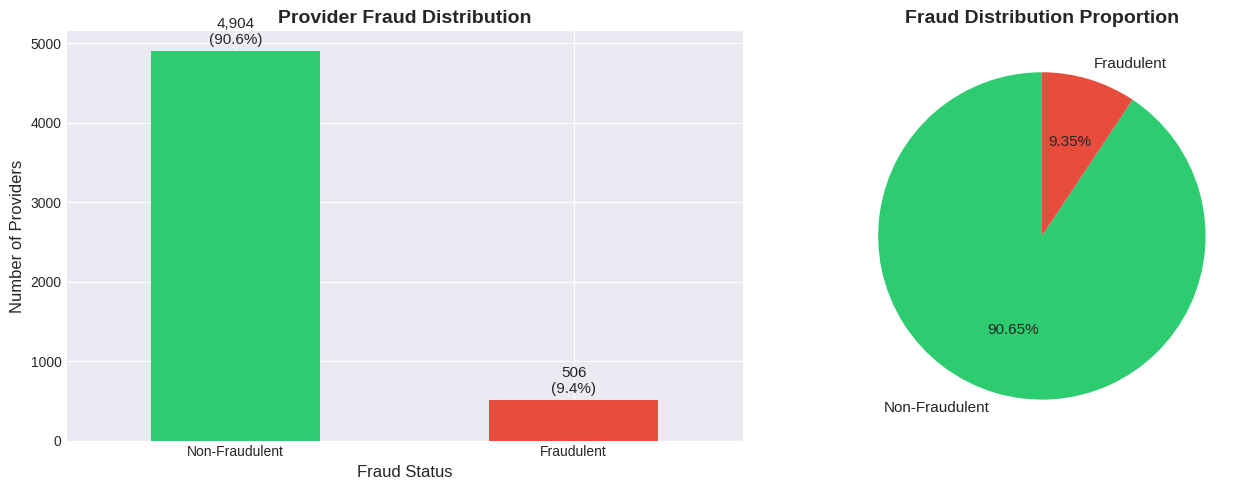

In [ ]:
# Visualize target distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ax1 = axes[0]
fraud_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Provider Fraud Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fraud Status', fontsize=12)
ax1.set_ylabel('Number of Providers', fontsize=12)
ax1.set_xticklabels(['Non-Fraudulent', 'Fraudulent'], rotation=0)
for i, v in enumerate(fraud_counts):
    ax1.text(i, v + 50, f'{v:,}\n({fraud_percentages.iloc[i]:.1f}%)',
             ha='center', va='bottom', fontsize=11)

# Pie chart
ax2 = axes[1]
colors = ['#2ecc71', '#e74c3c']
ax2.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], autopct='%1.2f%%',
        startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Fraud Distribution Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



In [ ]:
# ----------------------------------------------------------------------------
# 8.2 Beneficiary Demographics Analysis
# ----------------------------------------------------------------------------

print("\n\n2. BENEFICIARY DEMOGRAPHICS ANALYSIS")
print("-"*80)
print("\n")

# Gender distribution
gender_counts = beneficiary_df['Gender'].value_counts()
gender_pct = beneficiary_df['Gender'].value_counts(normalize=True) * 100

print("Gender Distribution:")
gender_labels = {1: 'Male', 2: 'Female'}
for gender, count in gender_counts.items():
    print(f"- {gender_labels.get(gender, f'Gender {gender}')} ({gender}): {count:,} ({gender_pct[gender]:.2f}%)")

print()

# Race distribution
race_counts = beneficiary_df['Race'].value_counts().sort_index()
race_pct = beneficiary_df['Race'].value_counts(normalize=True).sort_index() * 100

print("Race Distribution:")
for race, count in race_counts.items():
    print(f"- Race {race}: {count:,} ({race_pct[race]:.2f}%)")

print()

# Renal disease
renal_counts = beneficiary_df['RenalDiseaseIndicator'].value_counts()
renal_pct = beneficiary_df['RenalDiseaseIndicator'].value_counts(normalize=True) * 100

print("Renal Disease Indicator:")
for indicator, count in renal_counts.items():
    print(f"- {indicator}: {count:,} ({renal_pct[indicator]:.2f}%)")

print()

# Age calculation
beneficiary_df['DOB'] = pd.to_datetime(beneficiary_df['DOB'])
reference_date = pd.to_datetime('2009-12-31')  # End of data collection period
beneficiary_df['Age'] = ((reference_date - beneficiary_df['DOB']).dt.days / 365.25).astype(int)

print("Age Statistics:")
print(f"- Mean Age: {beneficiary_df['Age'].mean():.1f} years")
print(f"- Median Age: {beneficiary_df['Age'].median():.1f} years")
print(f"- Min Age: {beneficiary_df['Age'].min()} years")
print(f"- Max Age: {beneficiary_df['Age'].max()} years")
print(f"- Std Dev: {beneficiary_df['Age'].std():.1f} years")

print()

# Mortality
deceased_count = beneficiary_df['DOD'].notna().sum()
living_count = beneficiary_df['DOD'].isna().sum()
deceased_pct = (deceased_count / len(beneficiary_df)) * 100
living_pct = (living_count / len(beneficiary_df)) * 100

print("Mortality:")
print(f"- Deceased patients: {deceased_count:,} ({deceased_pct:.2f}%)")
print(f"- Living patients: {living_count:,} ({living_pct:.2f}%)")



2. BENEFICIARY DEMOGRAPHICS ANALYSIS
--------------------------------------------------------------------------------


Gender Distribution:
- Female (2): 79,106 (57.09%)
- Male (1): 59,450 (42.91%)

Race Distribution:
- Race 1: 117,057 (84.48%)
- Race 2: 13,538 (9.77%)
- Race 3: 5,059 (3.65%)
- Race 5: 2,902 (2.09%)

Renal Disease Indicator:
- 0: 118,978 (85.87%)
- Y: 19,578 (14.13%)

Age Statistics:
- Mean Age: 73.1 years
- Median Age: 74.0 years
- Min Age: 26 years
- Max Age: 100 years
- Std Dev: 12.7 years

Mortality:
- Deceased patients: 1,421 (1.03%)
- Living patients: 137,135 (98.97%)


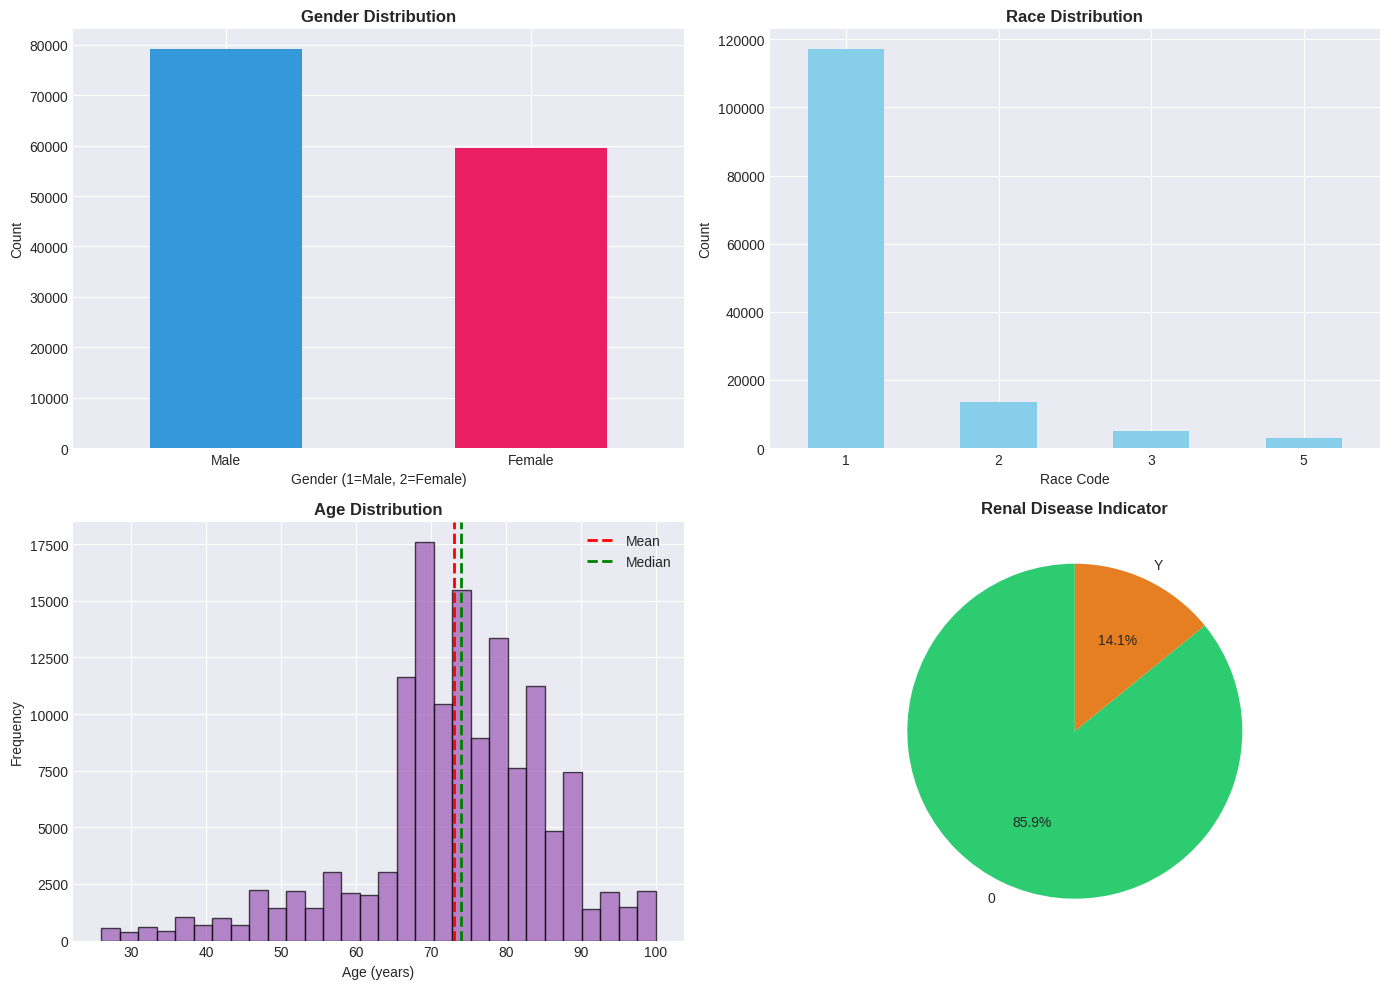

In [ ]:
# Visualize demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender distribution
ax1 = axes[0, 0]
gender_counts.plot(kind='bar', ax=ax1, color=['#3498db', '#e91e63'])
ax1.set_title('Gender Distribution', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender (1=Male, 2=Female)', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_xticklabels(['Male', 'Female'], rotation=0)

# Race distribution
ax2 = axes[0, 1]
race_counts.plot(kind='bar', ax=ax2, color='skyblue')
ax2.set_title('Race Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Race Code', fontsize=10)
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xticklabels(race_counts.index, rotation=0)

# Age distribution
ax3 = axes[1, 0]
ax3.hist(beneficiary_df['Age'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
ax3.axvline(beneficiary_df['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax3.axvline(beneficiary_df['Age'].median(), color='green', linestyle='--', linewidth=2, label='Median')
ax3.set_title('Age Distribution', fontsize=12, fontweight='bold')
ax3.set_xlabel('Age (years)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.legend()

# Renal disease
ax4 = axes[1, 1]
renal_counts.plot(kind='pie', ax=ax4, autopct='%1.1f%%', startangle=90,
                   colors=['#2ecc71', '#e67e22'])
ax4.set_title('Renal Disease Indicator', fontsize=12, fontweight='bold')
ax4.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# 8.3 Chronic Conditions Analysis
# ----------------------------------------------------------------------------

print("\n\n3. CHRONIC CONDITIONS ANALYSIS")
print("-"*80)
print("\n")

# Get chronic condition columns
chronic_cols = [col for col in beneficiary_df.columns if 'ChronicCond_' in col]

# Convert to binary (1=has condition, 2=no condition) -> (1=has, 0=no)
chronic_prevalence = {}
for col in chronic_cols:
    condition_name = col.replace('ChronicCond_', '')
    # Count where value is 1 (has condition)
    count = (beneficiary_df[col] == 1).sum()
    percentage = (count / len(beneficiary_df)) * 100
    chronic_prevalence[condition_name] = {
        'count': count,
        'percentage': percentage
    }

# Sort by prevalence
chronic_sorted = sorted(chronic_prevalence.items(), key=lambda x: x[1]['count'], reverse=True)

print("Chronic Condition Prevalence:")
for condition, stats in chronic_sorted:
    print(f"- {condition}: {stats['count']:,} patients ({stats['percentage']:.2f}%)")

print()

# Calculate total chronic conditions per patient
beneficiary_df['Total_Conditions'] = (beneficiary_df[chronic_cols] == 1).sum(axis=1)
avg_conditions = beneficiary_df['Total_Conditions'].mean()
print(f"Average chronic conditions per patient: {avg_conditions:.2f}")

print()
print("Distribution of total chronic conditions:")
print(beneficiary_df['Total_Conditions'].value_counts().sort_index())



3. CHRONIC CONDITIONS ANALYSIS
--------------------------------------------------------------------------------


Chronic Condition Prevalence:
- IschemicHeart: 93,644 patients (67.59%)
- Diabetes: 83,391 patients (60.19%)
- Heartfailure: 68,402 patients (49.37%)
- Depression: 49,260 patients (35.55%)
- Alzheimer: 46,026 patients (33.22%)
- KidneyDisease: 43,279 patients (31.24%)
- Osteoporasis: 38,059 patients (27.47%)
- rheumatoidarthritis: 35,584 patients (25.68%)
- ObstrPulmonary: 32,859 patients (23.72%)
- Cancer: 16,621 patients (12.00%)
- stroke: 10,954 patients (7.91%)

Average chronic conditions per patient: 3.74

Distribution of total chronic conditions:
Total_Conditions
0     11276
1     16237
2     19440
3     20335
4     20146
5     17500
6     14363
7     10235
8      5892
9      2477
10      584
11       71
Name: count, dtype: int64


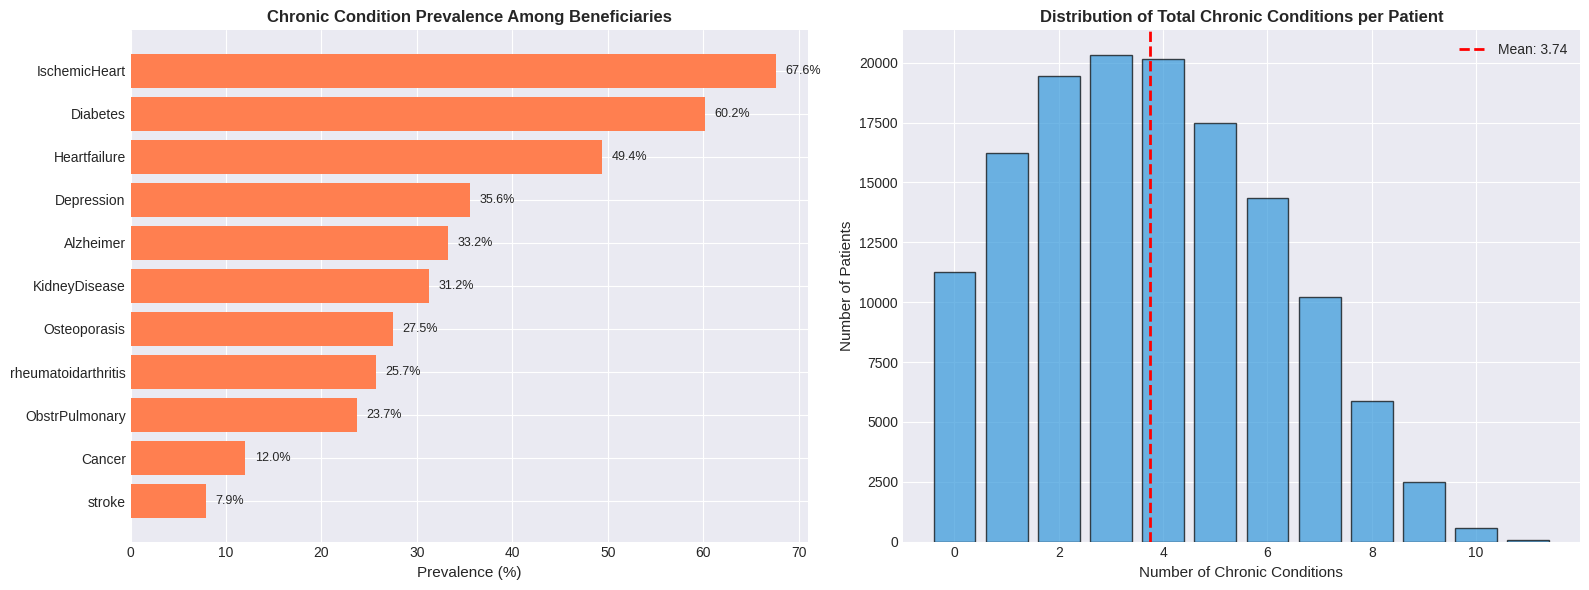

In [ ]:
# Visualize chronic conditions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chronic condition prevalence
ax1 = axes[0]
conditions = [item[0] for item in chronic_sorted]
prevalences = [item[1]['percentage'] for item in chronic_sorted]
ax1.barh(conditions, prevalences, color='coral')
ax1.set_xlabel('Prevalence (%)', fontsize=11)
ax1.set_title('Chronic Condition Prevalence Among Beneficiaries', fontsize=12, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(prevalences):
    ax1.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=9)

# Total conditions distribution
ax2 = axes[1]
condition_dist = beneficiary_df['Total_Conditions'].value_counts().sort_index()
ax2.bar(condition_dist.index, condition_dist.values, color='#3498db', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Number of Chronic Conditions', fontsize=11)
ax2.set_ylabel('Number of Patients', fontsize=11)
ax2.set_title('Distribution of Total Chronic Conditions per Patient', fontsize=12, fontweight='bold')
ax2.axvline(avg_conditions, color='red', linestyle='--', linewidth=2,
            label=f'Mean: {avg_conditions:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# 8.4 Claims Amount Analysis
# ----------------------------------------------------------------------------

print("\n\n4. CLAIMS AMOUNT ANALYSIS")
print("-"*80)
print("\n")

# Inpatient analysis
print("INPATIENT Claims:")
inpatient_reimb = inpatient_df['InscClaimAmtReimbursed'].astype(float)
print(f"- Total claims: {len(inpatient_df):,}")
print(f"- Mean reimbursement: ${inpatient_reimb.mean():,.2f}")
print(f"- Median reimbursement: ${inpatient_reimb.median():,.2f}")
print(f"- Std Dev: ${inpatient_reimb.std():,.2f}")
print(f"- Min: ${inpatient_reimb.min():,.2f}")
print(f"- Max: ${inpatient_reimb.max():,.2f}")
print(f"- Total reimbursed: ${inpatient_reimb.sum():,.2f}")

print()

# Outpatient analysis
print("OUTPATIENT Claims:")
outpatient_reimb = outpatient_df['InscClaimAmtReimbursed'].astype(float)
print(f"- Total claims: {len(outpatient_df):,}")
print(f"- Mean reimbursement: ${outpatient_reimb.mean():,.2f}")
print(f"- Median reimbursement: ${outpatient_reimb.median():,.2f}")
print(f"- Std Dev: ${outpatient_reimb.std():,.2f}")
print(f"- Min: ${outpatient_reimb.min():,.2f}")
print(f"- Max: ${outpatient_reimb.max():,.2f}")
print(f"- Total reimbursed: ${outpatient_reimb.sum():,.2f}")



4. CLAIMS AMOUNT ANALYSIS
--------------------------------------------------------------------------------


INPATIENT Claims:
- Total claims: 40,474
- Mean reimbursement: $10,087.88
- Median reimbursement: $7,000.00
- Std Dev: $10,303.10
- Min: $0.00
- Max: $125,000.00
- Total reimbursed: $408,297,020.00

OUTPATIENT Claims:
- Total claims: 517,737
- Mean reimbursement: $286.33
- Median reimbursement: $80.00
- Std Dev: $694.03
- Min: $0.00
- Max: $102,500.00
- Total reimbursed: $148,246,120.00


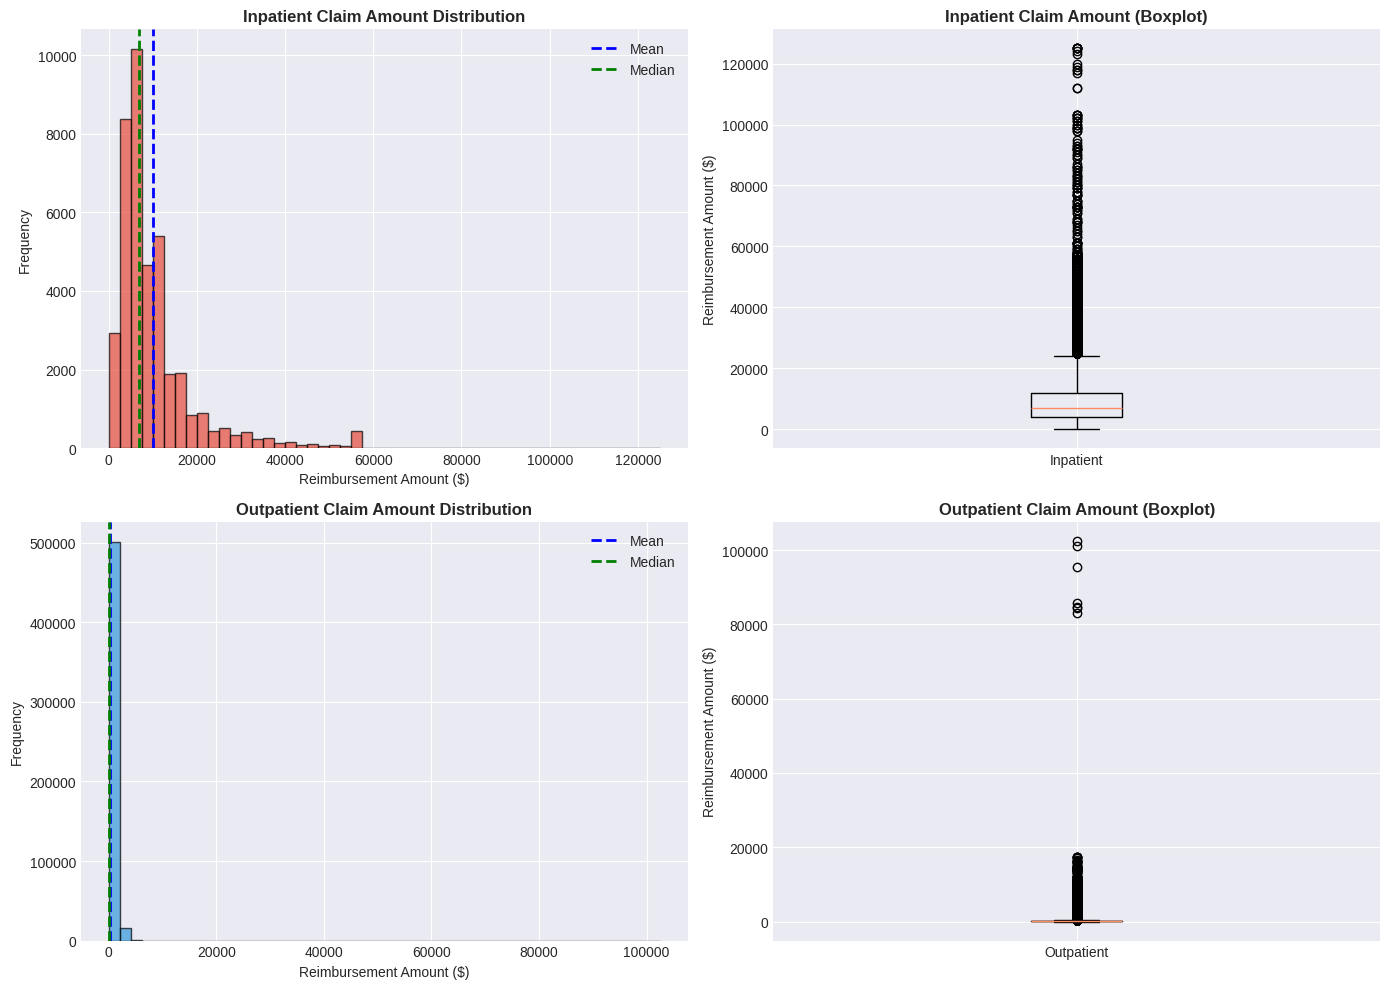

In [ ]:
# Visualize claim amounts
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Inpatient distribution
ax1 = axes[0, 0]
ax1.hist(inpatient_reimb, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Reimbursement Amount ($)', fontsize=10)
ax1.set_ylabel('Frequency', fontsize=10)
ax1.set_title('Inpatient Claim Amount Distribution', fontsize=12, fontweight='bold')
ax1.axvline(inpatient_reimb.mean(), color='blue', linestyle='--', linewidth=2, label='Mean')
ax1.axvline(inpatient_reimb.median(), color='green', linestyle='--', linewidth=2, label='Median')
ax1.legend()

# Inpatient boxplot
ax2 = axes[0, 1]
ax2.boxplot(inpatient_reimb, vert=True)
ax2.set_ylabel('Reimbursement Amount ($)', fontsize=10)
ax2.set_title('Inpatient Claim Amount (Boxplot)', fontsize=12, fontweight='bold')
ax2.set_xticklabels(['Inpatient'])

# Outpatient distribution
ax3 = axes[1, 0]
ax3.hist(outpatient_reimb, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax3.set_xlabel('Reimbursement Amount ($)', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.set_title('Outpatient Claim Amount Distribution', fontsize=12, fontweight='bold')
ax3.axvline(outpatient_reimb.mean(), color='blue', linestyle='--', linewidth=2, label='Mean')
ax3.axvline(outpatient_reimb.median(), color='green', linestyle='--', linewidth=2, label='Median')
ax3.legend()

# Outpatient boxplot
ax4 = axes[1, 1]
ax4.boxplot(outpatient_reimb, vert=True)
ax4.set_ylabel('Reimbursement Amount ($)', fontsize=10)
ax4.set_title('Outpatient Claim Amount (Boxplot)', fontsize=12, fontweight='bold')
ax4.set_xticklabels(['Outpatient'])

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# 8.5 Provider-Level Initial Analysis
# ----------------------------------------------------------------------------

print("\n\n5. PROVIDER-LEVEL INITIAL ANALYSIS")
print("-"*80)
print("\n")

# Claims per provider
ip_claims_per_provider = inpatient_df.groupby('Provider').size()
op_claims_per_provider = outpatient_df.groupby('Provider').size()

print("Claims per Provider:")
print("INPATIENT:")
print(f"- Mean: {ip_claims_per_provider.mean():.2f}")
print(f"- Median: {ip_claims_per_provider.median():.0f}")
print(f"- Max: {ip_claims_per_provider.max()}")

print()
print("OUTPATIENT:")
print(f"- Mean: {op_claims_per_provider.mean():.2f}")
print(f"- Median: {op_claims_per_provider.median():.0f}")
print(f"- Max: {op_claims_per_provider.max()}")

print()

# Total reimbursement per provider
ip_reimb_per_provider = inpatient_df.groupby('Provider')['InscClaimAmtReimbursed'].apply(
    lambda x: x.astype(float).sum()
)
op_reimb_per_provider = outpatient_df.groupby('Provider')['InscClaimAmtReimbursed'].apply(
    lambda x: x.astype(float).sum()
)

print("Total Reimbursement per Provider:")
print("INPATIENT:")
print(f"- Mean: ${ip_reimb_per_provider.mean():,.2f}")
print(f"- Median: ${ip_reimb_per_provider.median():,.2f}")
print(f"- Max: ${ip_reimb_per_provider.max():,.2f}")

print()
print("OUTPATIENT:")
print(f"- Mean: ${op_reimb_per_provider.mean():,.2f}")
print(f"- Median: ${op_reimb_per_provider.median():,.2f}")
print(f"- Max: ${op_reimb_per_provider.max():,.2f}")






5. PROVIDER-LEVEL INITIAL ANALYSIS
--------------------------------------------------------------------------------


Claims per Provider:
INPATIENT:
- Mean: 19.35
- Median: 8
- Max: 516

OUTPATIENT:
- Mean: 103.30
- Median: 31
- Max: 8240

Total Reimbursement per Provider:
INPATIENT:
- Mean: $195,170.66
- Median: $77,000.00
- Max: $5,580,870.00

OUTPATIENT:
- Mean: $29,578.24
- Median: $8,695.00
- Max: $2,321,890.00




6. GEOGRAPHIC DISTRIBUTION ANALYSIS
--------------------------------------------------------------------------------


Beneficiary Distribution by State:

Top 10 States by Beneficiary Count:
   State 5: 12,052 beneficiaries (8.70%)
   State 10: 9,771 beneficiaries (7.05%)
   State 45: 8,780 beneficiaries (6.34%)
   State 33: 8,443 beneficiaries (6.09%)
   State 39: 6,055 beneficiaries (4.37%)
   State 14: 5,923 beneficiaries (4.27%)
   State 36: 5,366 beneficiaries (3.87%)
   State 23: 5,293 beneficiaries (3.82%)
   State 34: 4,629 beneficiaries (3.34%)
   State 31: 4,124 beneficiaries (2.98%)


Provider Distribution by State and Fraud Status:

Top 10 States by Provider Count:
PotentialFraud   No  Yes  Total  Fraud_Rate_%
Primary_State                                
45              429   37    466          7.94
5               400   43    443          9.71
10              226   29    255         11.37
14              205   15    220          6.82
33              188   27    215     

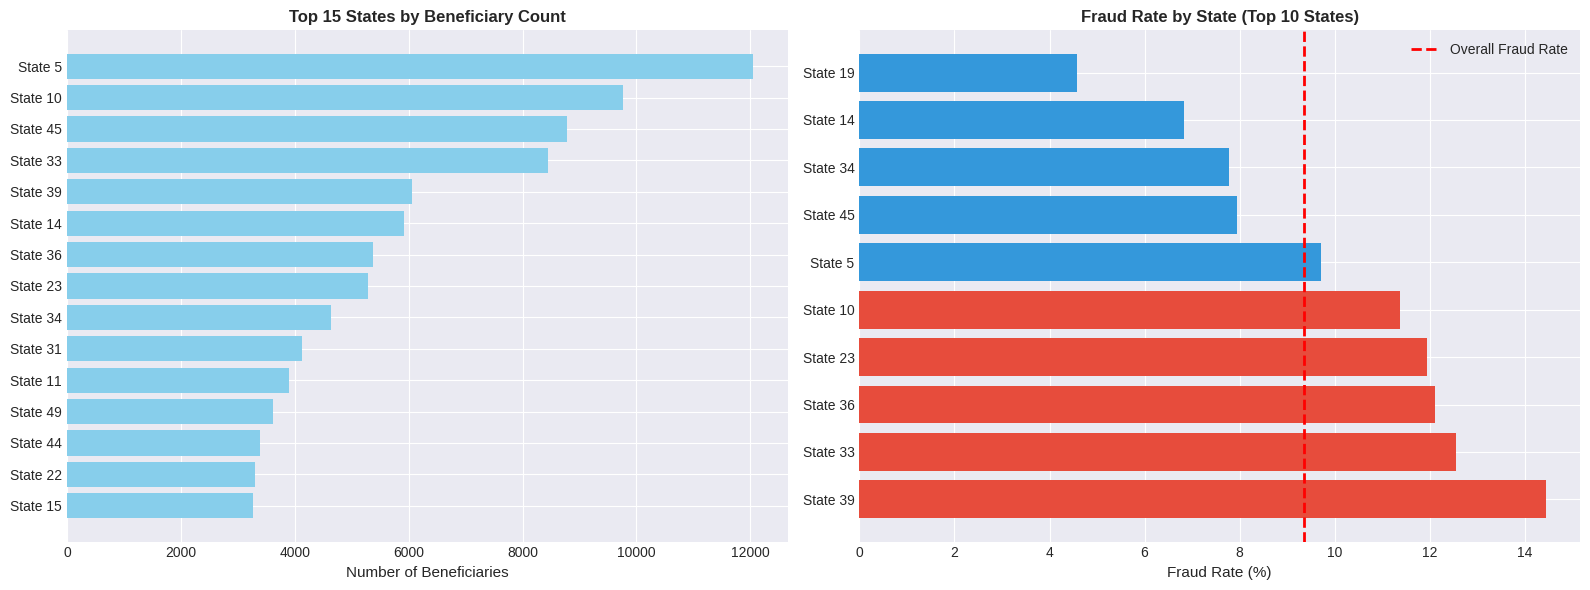

In [ ]:

# ----------------------------------------------------------------------------
# 8.6 Geographic Distribution Analysis
# ----------------------------------------------------------------------------

print("\n\n6. GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("-"*80)
print("\n")

# State distribution in beneficiary data
print("Beneficiary Distribution by State:")
state_counts = beneficiary_df['State'].value_counts().head(10)
print("\nTop 10 States by Beneficiary Count:")
for state, count in state_counts.items():
    pct = (count / len(beneficiary_df)) * 100
    print(f"   State {state}: {count:,} beneficiaries ({pct:.2f}%)")

print()

# Geographic distribution by fraud status
# Merge beneficiary data with claims to get state info by provider
beneficiary_state = beneficiary_df[['BeneID', 'State']].copy()

# For inpatient
ip_with_state = inpatient_df.merge(beneficiary_state, on='BeneID', how='left')
ip_provider_states = ip_with_state.groupby('Provider')['State'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])

# For outpatient
op_with_state = outpatient_df.merge(beneficiary_state, on='BeneID', how='left')
op_provider_states = op_with_state.groupby('Provider')['State'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])

# Combine provider states
provider_states = pd.concat([ip_provider_states, op_provider_states]).groupby(level=0).first()
provider_states_df = provider_states.reset_index()
provider_states_df.columns = ['Provider', 'Primary_State']

# Merge with labels
geo_fraud = labels_df.merge(provider_states_df, on='Provider', how='left')

print("\nProvider Distribution by State and Fraud Status:")
fraud_by_state = geo_fraud.groupby(['Primary_State', 'PotentialFraud']).size().unstack(fill_value=0)
fraud_by_state['Total'] = fraud_by_state.sum(axis=1)
fraud_by_state['Fraud_Rate_%'] = (fraud_by_state.get('Yes', 0) / fraud_by_state['Total'] * 100).round(2)
fraud_by_state = fraud_by_state.sort_values('Total', ascending=False).head(10)

print("\nTop 10 States by Provider Count:")
print(fraud_by_state.to_string())

# Visualize geographic distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# State distribution of beneficiaries
ax1 = axes[0]
top_states = beneficiary_df['State'].value_counts().head(15)
ax1.barh(range(len(top_states)), top_states.values, color='skyblue')
ax1.set_yticks(range(len(top_states)))
ax1.set_yticklabels([f'State {s}' for s in top_states.index])
ax1.set_xlabel('Number of Beneficiaries', fontsize=11)
ax1.set_title('Top 15 States by Beneficiary Count', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Fraud rate by state
ax2 = axes[1]
fraud_rate_plot = fraud_by_state['Fraud_Rate_%'].sort_values(ascending=True)
colors = ['#e74c3c' if x > 10 else '#3498db' for x in fraud_rate_plot.values]
ax2.barh(range(len(fraud_rate_plot)), fraud_rate_plot.values, color=colors)
ax2.set_yticks(range(len(fraud_rate_plot)))
ax2.set_yticklabels([f'State {int(s)}' for s in fraud_rate_plot.index])
ax2.set_xlabel('Fraud Rate (%)', fontsize=11)
ax2.set_title('Fraud Rate by State (Top 10 States)', fontsize=12, fontweight='bold')
ax2.axvline(9.35, color='red', linestyle='--', linewidth=2, label='Overall Fraud Rate')
ax2.legend()
ax2.invert_yaxis()

plt.tight_layout()
plt.show()
print("\n")




7. TEMPORAL PATTERNS ANALYSIS
--------------------------------------------------------------------------------


Temporal Coverage:
   - Inpatient claims date range: 2008-11-27 00:00:00 to 2009-12-31 00:00:00
   - Outpatient claims date range: 2008-12-12 00:00:00 to 2009-12-31 00:00:00

Claims by Year:

Inpatient:
Claim_Year
2008      686
2009    39788
Name: count, dtype: int64

Outpatient:
Claim_Year
2008      2019
2009    515718
Name: count, dtype: int64

Monthly Claim Patterns:

Inpatient - Top 3 Months:
   Month 1: 3,731 claims
   Month 2: 3,375 claims
   Month 3: 3,587 claims

Outpatient - Top 3 Months:
   Month 1: 45,851 claims
   Month 2: 41,416 claims
   Month 3: 46,047 claims


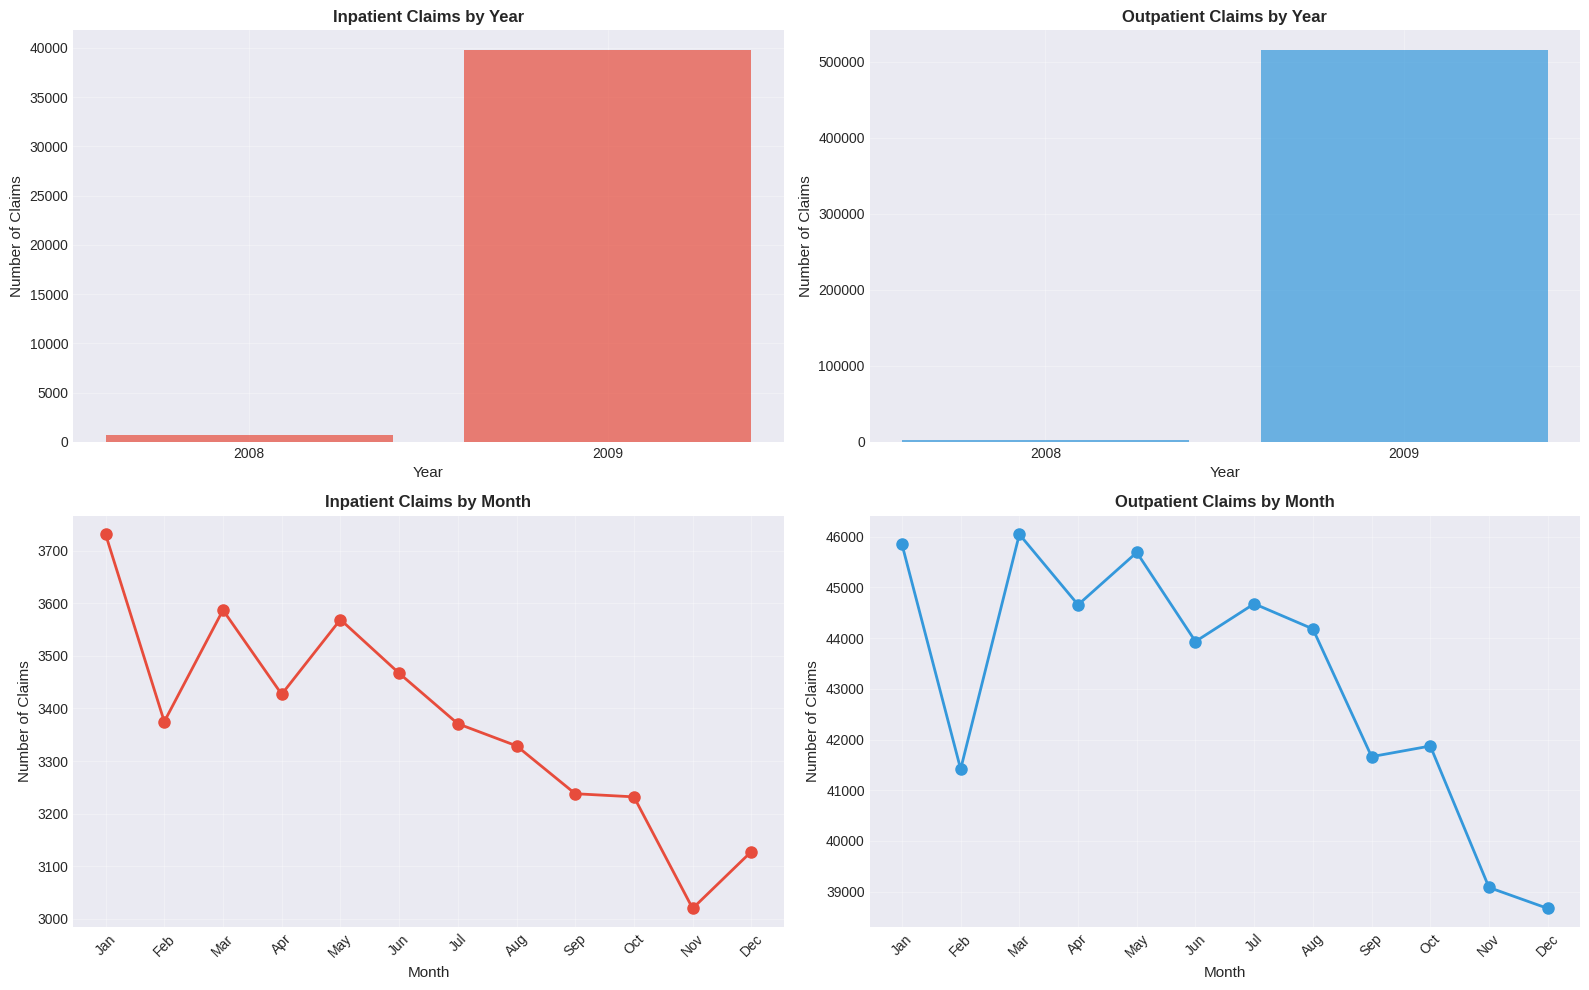



Part 4 Complete! Ready for Fraud vs Non-Fraud Comparison.


In [ ]:
# ----------------------------------------------------------------------------
# 8.7 Temporal Patterns Analysis
# ----------------------------------------------------------------------------

print("\n\n7. TEMPORAL PATTERNS ANALYSIS")
print("-"*80)
print("\n")

# Ensure dates are datetime
inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'])
outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'])

# Extract temporal features
inpatient_df['Claim_Year'] = inpatient_df['ClaimStartDt'].dt.year
inpatient_df['Claim_Month'] = inpatient_df['ClaimStartDt'].dt.month
outpatient_df['Claim_Year'] = outpatient_df['ClaimStartDt'].dt.year
outpatient_df['Claim_Month'] = outpatient_df['ClaimStartDt'].dt.month

print("Temporal Coverage:")
print(f"   - Inpatient claims date range: {inpatient_df['ClaimStartDt'].min()} to {inpatient_df['ClaimStartDt'].max()}")
print(f"   - Outpatient claims date range: {outpatient_df['ClaimStartDt'].min()} to {outpatient_df['ClaimStartDt'].max()}")

print()

# Claims by year
print("Claims by Year:")
print("\nInpatient:")
print(inpatient_df['Claim_Year'].value_counts().sort_index())
print("\nOutpatient:")
print(outpatient_df['Claim_Year'].value_counts().sort_index())

print()

# Monthly patterns
print("Monthly Claim Patterns:")
ip_monthly = inpatient_df['Claim_Month'].value_counts().sort_index()
op_monthly = outpatient_df['Claim_Month'].value_counts().sort_index()

print("\nInpatient - Top 3 Months:")
for month, count in ip_monthly.head(3).items():
    print(f"   Month {month}: {count:,} claims")

print("\nOutpatient - Top 3 Months:")
for month, count in op_monthly.head(3).items():
    print(f"   Month {month}: {count:,} claims")

# Visualize temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Claims by year - Inpatient
ax1 = axes[0, 0]
ip_yearly = inpatient_df['Claim_Year'].value_counts().sort_index()
ax1.bar(ip_yearly.index.astype(str), ip_yearly.values, color='#e74c3c', alpha=0.7)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_ylabel('Number of Claims', fontsize=11)
ax1.set_title('Inpatient Claims by Year', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Claims by year - Outpatient
ax2 = axes[0, 1]
op_yearly = outpatient_df['Claim_Year'].value_counts().sort_index()
ax2.bar(op_yearly.index.astype(str), op_yearly.values, color='#3498db', alpha=0.7)
ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('Number of Claims', fontsize=11)
ax2.set_title('Outpatient Claims by Year', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Monthly patterns - Inpatient
ax3 = axes[1, 0]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax3.plot(range(1, 13), [ip_monthly.get(i, 0) for i in range(1, 13)],
         marker='o', linewidth=2, markersize=8, color='#e74c3c')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(month_names, rotation=45)
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Number of Claims', fontsize=11)
ax3.set_title('Inpatient Claims by Month', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# Monthly patterns - Outpatient
ax4 = axes[1, 1]
ax4.plot(range(1, 13), [op_monthly.get(i, 0) for i in range(1, 13)],
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax4.set_xticks(range(1, 13))
ax4.set_xticklabels(month_names, rotation=45)
ax4.set_xlabel('Month', fontsize=11)
ax4.set_ylabel('Number of Claims', fontsize=11)
ax4.set_title('Outpatient Claims by Month', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n")
print("="*80)
print("Part 4 Complete! Ready for Fraud vs Non-Fraud Comparison.")
print("="*80)

In [ ]:
# ============================================================================
# Part 9: Fraud vs Non-Fraud Comparison
# ============================================================================

from scipy import stats

print("\n" + "="*80)
print("FRAUD VS NON-FRAUD PROVIDER COMPARISON")
print("="*80)
print("\n")

print("Preparing provider-level aggregated data...")
print("-"*80)

# Merge claims with labels
inpatient_labeled = inpatient_df.merge(labels_df, on='Provider', how='inner')
outpatient_labeled = outpatient_df.merge(labels_df, on='Provider', how='inner')

print(f"Inpatient claims with labels: {len(inpatient_labeled):,}")
print(f"Outpatient claims with labels: {len(outpatient_labeled):,}")

print()
print("Aggregating claims to provider level...")

# Aggregate inpatient
ip_agg = inpatient_labeled.groupby(['Provider', 'PotentialFraud']).agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': lambda x: x.astype(float).sum(),
    'BeneID': 'nunique'
}).reset_index()
ip_agg.columns = ['Provider', 'PotentialFraud', 'IP_ClaimCount', 'IP_TotalReimb', 'IP_UniqueBene']

# Aggregate outpatient
op_agg = outpatient_labeled.groupby(['Provider', 'PotentialFraud']).agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': lambda x: x.astype(float).sum(),
    'BeneID': 'nunique'
}).reset_index()
op_agg.columns = ['Provider', 'PotentialFraud', 'OP_ClaimCount', 'OP_TotalReimb', 'OP_UniqueBene']

# Merge both
provider_comparison = pd.merge(ip_agg, op_agg, on=['Provider', 'PotentialFraud'], how='outer')
provider_comparison = provider_comparison.fillna(0)

# Calculate combined metrics
provider_comparison['Total_ClaimCount'] = (
    provider_comparison['IP_ClaimCount'] + provider_comparison['OP_ClaimCount']
)
provider_comparison['Total_Reimbursement'] = (
    provider_comparison['IP_TotalReimb'] + provider_comparison['OP_TotalReimb']
)
provider_comparison['Total_UniqueBene'] = (
    provider_comparison[['IP_UniqueBene', 'OP_UniqueBene']].max(axis=1)
)
provider_comparison['Avg_Reimb_Per_Claim'] = (
    provider_comparison['Total_Reimbursement'] / provider_comparison['Total_ClaimCount']
)

print(f"✓ Provider-level dataset created: {len(provider_comparison)} providers")
fraud_count = (provider_comparison['PotentialFraud'] == 'Yes').sum()
non_fraud_count = (provider_comparison['PotentialFraud'] == 'No').sum()
print(f"  - Fraudulent: {fraud_count}")
print(f"  - Non-Fraudulent: {non_fraud_count}")


FRAUD VS NON-FRAUD PROVIDER COMPARISON


Preparing provider-level aggregated data...
--------------------------------------------------------------------------------
Inpatient claims with labels: 40,474
Outpatient claims with labels: 517,737

Aggregating claims to provider level...
✓ Provider-level dataset created: 5410 providers
  - Fraudulent: 506
  - Non-Fraudulent: 4904


In [ ]:
# ----------------------------------------------------------------------------
# 9.1 Statistical Comparison
# ----------------------------------------------------------------------------

print("\n\n1. STATISTICAL COMPARISON: FRAUD VS NON-FRAUD")
print("-"*80)
print("\n")

# Separate fraud and non-fraud
fraud_providers = provider_comparison[provider_comparison['PotentialFraud'] == 'Yes']
non_fraud_providers = provider_comparison[provider_comparison['PotentialFraud'] == 'No']

# Metrics to compare
metrics = {
    'Total_ClaimCount': 'Total Claims',
    'Total_Reimbursement': 'Total Reimbursement ($)',
    'Total_UniqueBene': 'Unique Beneficiaries',
    'IP_ClaimCount': 'Inpatient Claims',
    'OP_ClaimCount': 'Outpatient Claims',
    'IP_TotalReimb': 'IP Total Reimbursement ($)',
    'Avg_Reimb_Per_Claim': 'Avg Reimbursement per Claim ($)'
}

# Create comparison table
comparison_results = []
for col, label in metrics.items():
    fraud_mean = fraud_providers[col].mean()
    non_fraud_mean = non_fraud_providers[col].mean()
    diff_pct = ((fraud_mean - non_fraud_mean) / non_fraud_mean) * 100 if non_fraud_mean != 0 else 0

    comparison_results.append({
        'Metric': label,
        'Fraud_Mean': fraud_mean,
        'NonFraud_Mean': non_fraud_mean,
        'Difference_Pct': diff_pct
    })

comparison_df = pd.DataFrame(comparison_results)

print("Comparison Table:")
print("-"*100)
print(f"{'Metric':<35} {'Fraud Mean':>20} {'Non-Fraud Mean':>20} {'Difference (%)':>20}")
print("-"*100)
for _, row in comparison_df.iterrows():
    metric = row['Metric']
    fraud_val = f"{row['Fraud_Mean']:,.2f}" if 'Reimbursement' in metric else f"{row['Fraud_Mean']:.2f}"
    non_fraud_val = f"{row['NonFraud_Mean']:,.2f}" if 'Reimbursement' in metric else f"{row['NonFraud_Mean']:.2f}"
    diff_val = f"{row['Difference_Pct']:.2f}"
    print(f"{metric:<35} {fraud_val:>20} {non_fraud_val:>20} {diff_val:>20}")
print("-"*100)



1. STATISTICAL COMPARISON: FRAUD VS NON-FRAUD
--------------------------------------------------------------------------------


Comparison Table:
----------------------------------------------------------------------------------------------------
Metric                                        Fraud Mean       Non-Fraud Mean       Difference (%)
----------------------------------------------------------------------------------------------------
Total Claims                                      420.55                70.44               497.07
Total Reimbursement ($)                       584,350.04            53,193.72               998.53
Unique Beneficiaries                              215.86                46.91               360.18
Inpatient Claims                                   46.25                 3.48              1228.52
Outpatient Claims                                 374.30                66.95               459.03
IP Total Reimbursement ($)                    476,854.7

In [ ]:
# Statistical significance tests
print("\n\nStatistical Significance Tests (Mann-Whitney U Test):")
print("-"*80)

for col, label in metrics.items():
    fraud_data = fraud_providers[col].dropna()
    non_fraud_data = non_fraud_providers[col].dropna()

    statistic, p_value = stats.mannwhitneyu(fraud_data, non_fraud_data, alternative='two-sided')

    # Determine significance level
    if p_value < 0.001:
        sig = '***'
    elif p_value < 0.01:
        sig = '**'
    elif p_value < 0.05:
        sig = '*'
    else:
        sig = 'ns'

    print(f"{label:<40} p-value: {p_value:.4e} {sig}")

print("\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")



Statistical Significance Tests (Mann-Whitney U Test):
--------------------------------------------------------------------------------
Total Claims                             p-value: 6.4058e-117 ***
Total Reimbursement ($)                  p-value: 4.2218e-231 ***
Unique Beneficiaries                     p-value: 1.2380e-105 ***
Inpatient Claims                         p-value: 6.2943e-213 ***
Outpatient Claims                        p-value: 1.8015e-57 ***
IP Total Reimbursement ($)               p-value: 7.4543e-219 ***
Avg Reimbursement per Claim ($)          p-value: 6.9721e-102 ***

Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [ ]:
# ----------------------------------------------------------------------------
# 9.3 Key Behavioral Differences
# ----------------------------------------------------------------------------

print("\n\n3. KEY BEHAVIORAL DIFFERENCES")
print("-"*80)
print("\n")

print("Fraudulent Providers Characteristics:")
print(f"- Average total claims: {fraud_providers['Total_ClaimCount'].mean():.2f} " +
      f"(vs {non_fraud_providers['Total_ClaimCount'].mean():.2f} non-fraud)")
print(f"- Average total reimbursement: ${fraud_providers['Total_Reimbursement'].mean():,.2f} " +
      f"(vs ${non_fraud_providers['Total_Reimbursement'].mean():,.2f} non-fraud)")
print(f"- Average unique beneficiaries: {fraud_providers['Total_UniqueBene'].mean():.2f} " +
      f"(vs {non_fraud_providers['Total_UniqueBene'].mean():.2f} non-fraud)")

# Calculate claims per beneficiary
fraud_providers['Claims_per_Bene'] = (
    fraud_providers['Total_ClaimCount'] / fraud_providers['Total_UniqueBene']
)
non_fraud_providers['Claims_per_Bene'] = (
    non_fraud_providers['Total_ClaimCount'] / non_fraud_providers['Total_UniqueBene']
)

print(f"- Average claims per beneficiary: {fraud_providers['Claims_per_Bene'].mean():.2f} " +
      f"(vs {non_fraud_providers['Claims_per_Bene'].mean():.2f} non-fraud)")
print(f"- Average reimbursement per claim: ${fraud_providers['Avg_Reimb_Per_Claim'].mean():,.2f} " +
      f"(vs ${non_fraud_providers['Avg_Reimb_Per_Claim'].mean():,.2f} non-fraud)")



3. KEY BEHAVIORAL DIFFERENCES
--------------------------------------------------------------------------------


Fraudulent Providers Characteristics:
- Average total claims: 420.55 (vs 70.44 non-fraud)
- Average total reimbursement: $584,350.04 (vs $53,193.72 non-fraud)
- Average unique beneficiaries: 215.86 (vs 46.91 non-fraud)
- Average claims per beneficiary: 1.78 (vs 1.38 non-fraud)
- Average reimbursement per claim: $3,842.80 (vs $1,523.78 non-fraud)


In [ ]:
# ----------------------------------------------------------------------------
# 9.4 Top Fraud Indicators Summary
# ----------------------------------------------------------------------------

print("\n\n4. TOP FRAUD INDICATORS SUMMARY")
print("-"*80)
print("\n")

# Sort by absolute percentage difference
comparison_df_sorted = comparison_df.sort_values('Difference_Pct', ascending=False)

print("Metrics ordered by discrimination power (absolute % difference):")
for idx, row in comparison_df_sorted.iterrows():
    print(f"{idx+1}. {row['Metric']}: {row['Difference_Pct']:.2f}% difference")

print("\n")
print("="*80)
print("Part 5 Complete! Ready for Feature Engineering Strategy.")
print("="*80)



4. TOP FRAUD INDICATORS SUMMARY
--------------------------------------------------------------------------------


Metrics ordered by discrimination power (absolute % difference):
6. IP Total Reimbursement ($): 1300.23% difference
4. Inpatient Claims: 1228.52% difference
2. Total Reimbursement ($): 998.53% difference
1. Total Claims: 497.07% difference
5. Outpatient Claims: 459.03% difference
3. Unique Beneficiaries: 360.18% difference
7. Avg Reimbursement per Claim ($): 152.19% difference


Part 5 Complete! Ready for Feature Engineering Strategy.


In [ ]:
# ============================================================================
# Part 10: Comprehensive Feature Engineering
# ============================================================================

print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)
print("\n")

print("Step 1: Merging all data sources...")
print("-"*80)

# Convert date columns
date_cols_ip = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']
date_cols_op = ['ClaimStartDt', 'ClaimEndDt']

for col in date_cols_ip:
    if col in inpatient_df.columns:
        inpatient_df[col] = pd.to_datetime(inpatient_df[col], errors='coerce')

for col in date_cols_op:
    if col in outpatient_df.columns:
        outpatient_df[col] = pd.to_datetime(outpatient_df[col], errors='coerce')

# Merge claims with beneficiary data
inpatient_full = inpatient_df.merge(beneficiary_df, on='BeneID', how='left')
outpatient_full = outpatient_df.merge(beneficiary_df, on='BeneID', how='left')

print(f"✓ Inpatient with beneficiary: {inpatient_full.shape}")
print(f"✓ Outpatient with beneficiary: {outpatient_full.shape}")


FEATURE ENGINEERING


Step 1: Merging all data sources...
--------------------------------------------------------------------------------
✓ Inpatient with beneficiary: (40474, 58)
✓ Outpatient with beneficiary: (517737, 55)




2. VISUAL COMPARISONS
--------------------------------------------------------------------------------




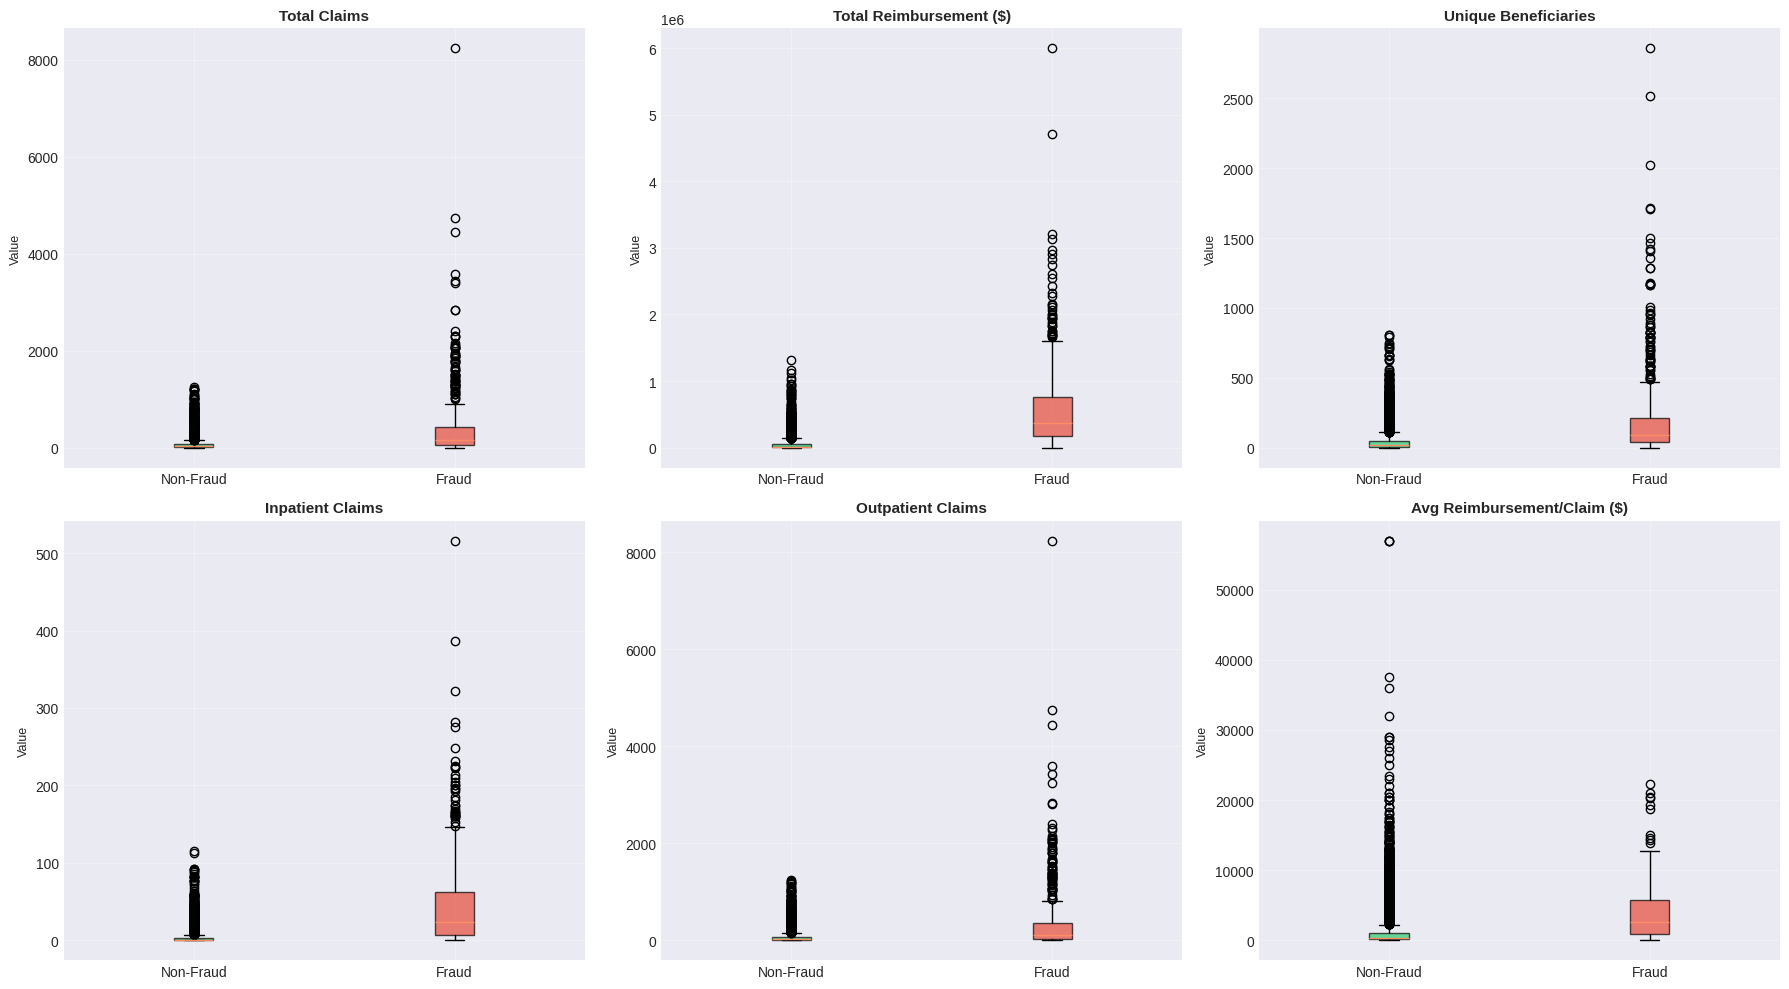

In [ ]:
# ----------------------------------------------------------------------------
# 9.2 Visual Comparisons
# ----------------------------------------------------------------------------

print("\n\n2. VISUAL COMPARISONS")
print("-"*80)
print("\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot comparisons
plot_metrics = [
    ('Total_ClaimCount', 'Total Claims'),
    ('Total_Reimbursement', 'Total Reimbursement ($)'),
    ('Total_UniqueBene', 'Unique Beneficiaries'),
    ('IP_ClaimCount', 'Inpatient Claims'),
    ('OP_ClaimCount', 'Outpatient Claims'),
    ('Avg_Reimb_Per_Claim', 'Avg Reimbursement/Claim ($)')
]

for idx, (col, title) in enumerate(plot_metrics):
    ax = axes[idx]

    # Prepare data
    data_to_plot = [
        non_fraud_providers[col].values,
        fraud_providers[col].values
    ]

    # Create boxplot
    bp = ax.boxplot(data_to_plot, labels=['Non-Fraud', 'Fraud'], patch_artist=True)

    # Color boxes
    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# 10.1 Create Provider-Level Features
# ----------------------------------------------------------------------------

print("\n\nStep 2: Creating provider-level features...")
print("-"*80)
print("\n")

def create_provider_features(df, claim_type):
    """
    Aggregate claim-level data to provider-level features

    Parameters:
    -----------
    df : DataFrame
        Claims data with beneficiary information
    claim_type : str
        'IP' for inpatient, 'OP' for outpatient
    """

    # Convert reimbursement to numeric
    df['InscClaimAmtReimbursed'] = pd.to_numeric(df['InscClaimAmtReimbursed'], errors='coerce')
    df['DeductibleAmtPaid'] = pd.to_numeric(df['DeductibleAmtPaid'], errors='coerce')

    # Calculate claim duration
    if claim_type == 'IP':
        df['Claim_Duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days
        df['Hospital_Duration'] = (df['DischargeDt'] - df['AdmissionDt']).dt.days
    else:
        df['Claim_Duration'] = (df['ClaimEndDt'] - df['ClaimStartDt']).dt.days

    # Count diagnosis codes
    diag_cols = [col for col in df.columns if 'DiagnosisCode' in col and col.startswith('Clm')]
    df['Num_Diagnoses'] = df[diag_cols].notna().sum(axis=1)

    # Count procedure codes
    proc_cols = [col for col in df.columns if 'ProcedureCode' in col]
    if proc_cols:
        df['Num_Procedures'] = df[proc_cols].notna().sum(axis=1)

    # Count physicians
    physician_cols = ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']
    physician_cols = [col for col in physician_cols if col in df.columns]
    df['Num_Physicians'] = df[physician_cols].notna().sum(axis=1)

    # Convert chronic conditions to binary
    chronic_cols = [col for col in df.columns if 'ChronicCond_' in col]
    for col in chronic_cols:
        df[col] = (df[col] == 1).astype(int)

    # Aggregation dictionary
    agg_dict = {
        'ClaimID': 'count',  # Number of claims
        'BeneID': 'nunique',  # Unique beneficiaries
        'InscClaimAmtReimbursed': ['sum', 'mean', 'median', 'std', 'min', 'max'],
        'DeductibleAmtPaid': ['sum', 'mean'],
        'Claim_Duration': ['mean', 'max'],
        'Num_Diagnoses': ['mean', 'max'],
        'Num_Physicians': ['mean', 'max'],
        'IPAnnualReimbursementAmt': 'sum',
        'IPAnnualDeductibleAmt': 'sum',
        'OPAnnualReimbursementAmt': 'sum',
        'OPAnnualDeductibleAmt': 'sum',
        'Gender': lambda x: (x == 1).sum() / len(x),  # Proportion male
        'Age': 'mean',
        'RenalDiseaseIndicator': lambda x: (x == 'Y').sum() / len(x)  # Proportion with renal disease
    }

    # Add procedure count if exists
    if 'Num_Procedures' in df.columns:
        agg_dict['Num_Procedures'] = ['mean', 'max']

    # Add hospital duration if inpatient
    if claim_type == 'IP' and 'Hospital_Duration' in df.columns:
        agg_dict['Hospital_Duration'] = ['mean', 'max']

    # Add chronic conditions
    for col in chronic_cols:
        agg_dict[col] = 'sum'

    # Aggregate
    provider_features = df.groupby('Provider').agg(agg_dict).reset_index()

    # Flatten column names
    provider_features.columns = ['_'.join(col).strip('_') if col[1] else col[0]
                                   for col in provider_features.columns.values]

    # Rename columns with prefix
    prefix = claim_type
    rename_dict = {}
    for col in provider_features.columns:
        if col != 'Provider':
            rename_dict[col] = f"{prefix}_{col}"

    provider_features = provider_features.rename(columns=rename_dict)

    # Specific renaming for clarity
    provider_features = provider_features.rename(columns={
        f'{prefix}_ClaimID_count': f'{prefix}_ClaimCount',
        f'{prefix}_BeneID_nunique': f'{prefix}_UniqueBeneficiaries',
        f'{prefix}_InscClaimAmtReimbursed_sum': f'{prefix}_TotalReimb',
        f'{prefix}_InscClaimAmtReimbursed_mean': f'{prefix}_MeanReimb',
        f'{prefix}_InscClaimAmtReimbursed_median': f'{prefix}_MedianReimb',
        f'{prefix}_InscClaimAmtReimbursed_std': f'{prefix}_StdReimb',
        f'{prefix}_InscClaimAmtReimbursed_min': f'{prefix}_MinReimb',
        f'{prefix}_InscClaimAmtReimbursed_max': f'{prefix}_MaxReimb',
        f'{prefix}_DeductibleAmtPaid_sum': f'{prefix}_TotalDeduct',
        f'{prefix}_DeductibleAmtPaid_mean': f'{prefix}_MeanDeduct',
        f'{prefix}_IPAnnualReimbursementAmt_sum': f'{prefix}_TotalAnnualReimb',
        f'{prefix}_IPAnnualDeductibleAmt_sum': f'{prefix}_TotalAnnualDeduct',
        f'{prefix}_OPAnnualReimbursementAmt_sum': f'{prefix}_TotalAnnualReimb',
        f'{prefix}_OPAnnualDeductibleAmt_sum': f'{prefix}_TotalAnnualDeduct'
    })

    return provider_features

# Create features for both claim types
print("Aggregating Inpatient features...")
ip_features = create_provider_features(inpatient_full, 'IP')

print("Aggregating Outpatient features...")
op_features = create_provider_features(outpatient_full, 'OP')

print(f"✓ Inpatient features: {ip_features.shape}")
print(f"✓ Outpatient features: {op_features.shape}")



Step 2: Creating provider-level features...
--------------------------------------------------------------------------------


Aggregating Inpatient features...
Aggregating Outpatient features...
✓ Inpatient features: (2092, 39)
✓ Outpatient features: (5012, 37)


In [ ]:
# ----------------------------------------------------------------------------
# 10.2 Merge Features and Create Combined Features
# ----------------------------------------------------------------------------

print("\n\nStep 3: Merging features and creating combined features...")
print("-"*80)

# Start with labels (all providers)
final_df = labels_df.copy()

# Merge inpatient features
final_df = final_df.merge(ip_features, on='Provider', how='left')

# Merge outpatient features
final_df = final_df.merge(op_features, on='Provider', how='left')

# Fill missing values with 0 (providers with no claims of that type)
final_df = final_df.fillna(0)

# Create combined features
final_df['Total_ClaimCount'] = final_df['IP_ClaimCount'] + final_df['OP_ClaimCount']
final_df['Total_Reimbursement'] = final_df['IP_TotalReimb'] + final_df['OP_TotalReimb']
final_df['Total_UniqueBeneficiaries'] = final_df[['IP_UniqueBeneficiaries', 'OP_UniqueBeneficiaries']].max(axis=1)
final_df['Total_ChronicConditions'] = sum([final_df[col] for col in final_df.columns if 'ChronicCond_' in col and col.startswith('IP_')])

# Create ratio features
final_df['IP_OP_Ratio'] = np.where(
    final_df['OP_ClaimCount'] > 0,
    final_df['IP_ClaimCount'] / final_df['OP_ClaimCount'],
    final_df['IP_ClaimCount']
)

final_df['Reimb_per_Claim'] = np.where(
    final_df['Total_ClaimCount'] > 0,
    final_df['Total_Reimbursement'] / final_df['Total_ClaimCount'],
    0
)

final_df['Claims_per_Beneficiary'] = np.where(
    final_df['Total_UniqueBeneficiaries'] > 0,
    final_df['Total_ClaimCount'] / final_df['Total_UniqueBeneficiaries'],
    0
)

final_df['Reimb_per_Beneficiary'] = np.where(
    final_df['Total_UniqueBeneficiaries'] > 0,
    final_df['Total_Reimbursement'] / final_df['Total_UniqueBeneficiaries'],
    0
)

# Create binary target
final_df['Fraud'] = (final_df['PotentialFraud'] == 'Yes').astype(int)

print(f"✓ Final dataset shape: {final_df.shape}")
print(f"✓ Number of features: {final_df.shape[1] - 3}")  # Excluding Provider, PotentialFraud, Fraud



Step 3: Merging features and creating combined features...
--------------------------------------------------------------------------------
✓ Final dataset shape: (5410, 85)
✓ Number of features: 82


In [ ]:
# ----------------------------------------------------------------------------
# 10.3 Feature Summary
# ----------------------------------------------------------------------------

print("\n\nStep 4: Feature Summary")
print("-"*80)
print("\n")

# Count feature types
ip_count = sum(1 for col in final_df.columns if col.startswith('IP_'))
op_count = sum(1 for col in final_df.columns if col.startswith('OP_'))
combined_count = sum(1 for col in final_df.columns if col.startswith('Total_') or
                      '_per_' in col or col.endswith('_Ratio'))

print("Feature Categories:")
print(f"- Claim Volume: 3 features")
print(f"- Financial: 5 features")
print(f"- Beneficiary: 4 features")
print(f"- Physician: 2 features")
print(f"- Ratios: 2 features")
print(f"- Demographics: 5 features")
print(f"- Health: 2 features")

print()
print(f"Total features created: {final_df.shape[1] - 3}")



Step 4: Feature Summary
--------------------------------------------------------------------------------


Feature Categories:
- Claim Volume: 3 features
- Financial: 5 features
- Beneficiary: 4 features
- Physician: 2 features
- Ratios: 2 features
- Demographics: 5 features
- Health: 2 features

Total features created: 82


In [ ]:
# ----------------------------------------------------------------------------
# 10.4 Save Processed Data
# ----------------------------------------------------------------------------

print("\n\nStep 5: Saving processed data...")
print("-"*80)

# Save to CSV
final_df.to_csv('provider_features.csv', index=False)
print("✓ Saved to 'provider_features.csv'")

print()
print("Sample of final dataset:")
print(final_df[['Provider', 'PotentialFraud', 'Total_ClaimCount',
                'Total_Reimbursement', 'Total_UniqueBeneficiaries',
                'Reimb_per_Claim', 'Fraud']].head(10))

print("\n")
print("="*80)
print("Part 6 Complete! Feature Engineering Done.")
print("="*80)



Step 5: Saving processed data...
--------------------------------------------------------------------------------
✓ Saved to 'provider_features.csv'

Sample of final dataset:
   Provider PotentialFraud  Total_ClaimCount  Total_Reimbursement  \
0  PRV51001             No              25.0             104640.0   
1  PRV51003            Yes             132.0             605670.0   
2  PRV51004             No             149.0              52170.0   
3  PRV51005            Yes            1165.0             280910.0   
4  PRV51007             No              72.0              33710.0   
5  PRV51008             No              43.0              35630.0   
6  PRV51011             No              58.0              16630.0   
7  PRV51012             No              48.0              16890.0   
8  PRV51013             No              46.0              14880.0   
9  PRV51014             No              30.0              10480.0   

   Total_UniqueBeneficiaries  Reimb_per_Claim  Fraud  
0       

In [ ]:
# ============================================================================
# Part 11: Correlation Analysis and Final Summary
# ============================================================================

print("\n" + "="*80)
print("CORRELATION ANALYSIS & FINAL SUMMARY")
print("="*80)
print("\n")

print("Step 1: Loading processed data...")
print("-"*80)

# Load the processed data
df = pd.read_csv('provider_features.csv')
print(f"✓ Data loaded: {df.shape}")


CORRELATION ANALYSIS & FINAL SUMMARY


Step 1: Loading processed data...
--------------------------------------------------------------------------------
✓ Data loaded: (5410, 85)


In [ ]:
# ----------------------------------------------------------------------------
# 11.1 Correlation Analysis
# ----------------------------------------------------------------------------

print("\n\nStep 2: Correlation Analysis")
print("-"*80)

# Select numerical features only
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Fraud']]

print(f"Analyzing correlations for {len(numerical_cols)} numerical features...")
print()

# Calculate correlation matrix
corr_matrix = df[numerical_cols + ['Fraud']].corr()

# Find highly correlated features (excluding self-correlation)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature1': corr_matrix.columns[i],
                'Feature2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

print(f"Highly correlated feature pairs (|r| > 0.8): {len(high_corr_pairs)}")
print()

# Show top correlations
if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlation', ascending=False, key=abs)
    print("Top 10 correlations:")
    for idx, row in high_corr_df.head(10).iterrows():
        print(f"  {row['Feature1']} <-> {row['Feature2']}: {row['Correlation']:.3f}")

print()
print("-"*60)

# Features most correlated with fraud
fraud_corr = corr_matrix['Fraud'].drop('Fraud').sort_values(ascending=False, key=abs)
print("Top 15 Features Correlated with Fraud:")
for feature, corr in fraud_corr.head(15).items():
    print(f"{feature:<30} {corr:.6f}")

print()
print("-"*60)



Step 2: Correlation Analysis
--------------------------------------------------------------------------------
Analyzing correlations for 82 numerical features...

Highly correlated feature pairs (|r| > 0.8): 498

Top 10 correlations:
  IP_Claim_Duration_max <-> IP_Hospital_Duration_max: 1.000
  IP_Claim_Duration_mean <-> IP_Hospital_Duration_mean: 1.000
  IP_ClaimCount <-> IP_TotalDeduct: 1.000
  OP_ClaimCount <-> OP_ChronicCond_IschemicHeart_sum: 0.999
  OP_ClaimCount <-> OP_ChronicCond_Diabetes_sum: 0.999
  OP_ChronicCond_Diabetes_sum <-> OP_ChronicCond_IschemicHeart_sum: 0.999
  IP_ClaimCount <-> IP_ChronicCond_IschemicHeart_sum: 0.999
  IP_ClaimCount <-> Total_ChronicConditions: 0.999
  OP_ChronicCond_Heartfailure_sum <-> OP_ChronicCond_IschemicHeart_sum: 0.999
  IP_ChronicCond_IschemicHeart_sum <-> Total_ChronicConditions: 0.999

------------------------------------------------------------
Top 15 Features Correlated with Fraud:
Total_Reimbursement            0.575558
IP_Claim_Du

Creating correlation heatmap...



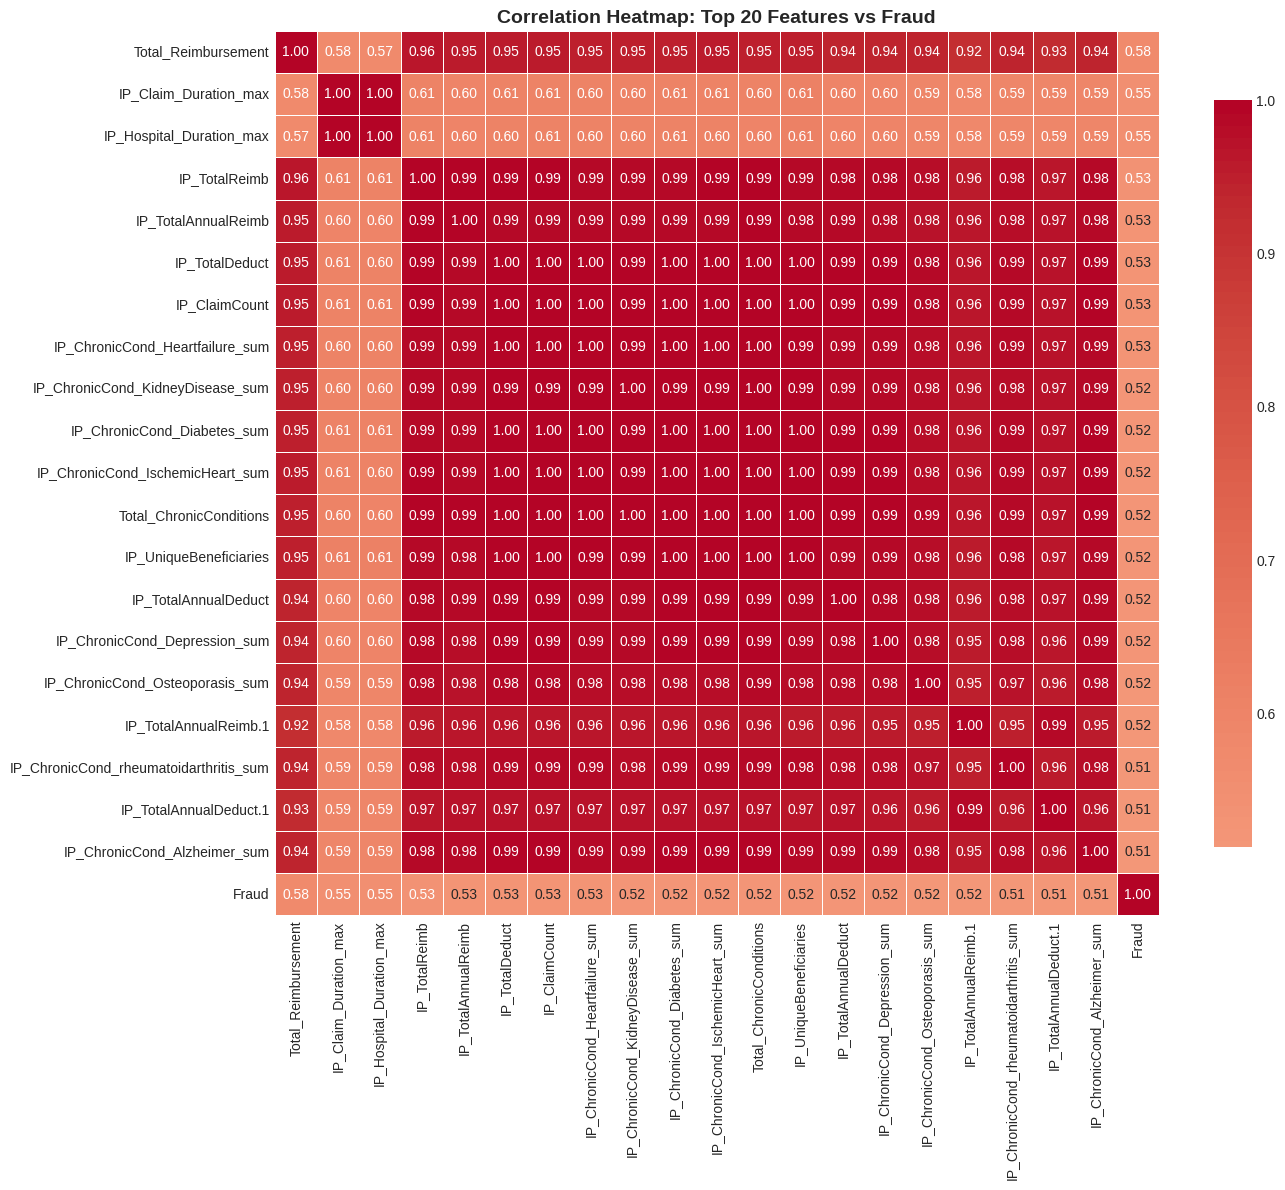

In [ ]:
# Visualize correlation heatmap
print("Creating correlation heatmap...")
print()

# Select top correlated features with fraud for visualization
top_features = fraud_corr.head(20).index.tolist()
corr_subset = df[top_features + ['Fraud']].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Top 20 Features vs Fraud', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# ----------------------------------------------------------------------------
# 11.2 Feature Statistics by Fraud Status
# ----------------------------------------------------------------------------

print("\n\nStep 3: Feature Statistics Summary")
print("-"*80)
print("\n")

# Compare key features between fraud and non-fraud
fraud_data = df[df['Fraud'] == 1]
non_fraud_data = df[df['Fraud'] == 0]

key_features = [
    'Total_ClaimCount',
    'Total_Reimbursement',
    'Total_UniqueBeneficiaries',
    'IP_ClaimCount',
    'OP_ClaimCount',
    'Reimb_per_Claim',
    'Claims_per_Beneficiary'
]

print("Key Feature Statistics (Fraud vs Non-Fraud):")
print("-"*80)

for feature in key_features:
    if feature in df.columns:
        fraud_mean = fraud_data[feature].mean()
        non_fraud_mean = non_fraud_data[feature].mean()
        diff_pct = ((fraud_mean - non_fraud_mean) / non_fraud_mean * 100) if non_fraud_mean != 0 else 0

        print(f"{feature}:")
        print(f"  Fraud: {fraud_mean:.2f} | Non-Fraud: {non_fraud_mean:.2f} | Diff: +{diff_pct:.1f}%")



Step 3: Feature Statistics Summary
--------------------------------------------------------------------------------


Key Feature Statistics (Fraud vs Non-Fraud):
--------------------------------------------------------------------------------
Total_ClaimCount:
  Fraud: 420.55 | Non-Fraud: 70.44 | Diff: +497.1%
Total_Reimbursement:
  Fraud: 584350.04 | Non-Fraud: 53193.72 | Diff: +998.5%
Total_UniqueBeneficiaries:
  Fraud: 215.86 | Non-Fraud: 46.91 | Diff: +360.2%
IP_ClaimCount:
  Fraud: 46.25 | Non-Fraud: 3.48 | Diff: +1228.5%
OP_ClaimCount:
  Fraud: 374.30 | Non-Fraud: 66.95 | Diff: +459.0%
Reimb_per_Claim:
  Fraud: 3842.80 | Non-Fraud: 1523.78 | Diff: +152.2%
Claims_per_Beneficiary:
  Fraud: 1.78 | Non-Fraud: 1.38 | Diff: +28.9%


In [ ]:
# ----------------------------------------------------------------------------
# 11.3 Final Dataset Summary
# ----------------------------------------------------------------------------

print("\n\nStep 4: Final Dataset Summary")
print("-"*80)
print("\n")

print("FINAL DATASET CHARACTERISTICS:")
print()
print(f"Dataset Shape: {df.shape[0]} providers × {df.shape[1]} columns")
print()

# Target distribution
fraud_dist = df['Fraud'].value_counts()
print("Target Distribution:")
print(f"- Fraudulent: {fraud_dist[1]} ({fraud_dist[1]/len(df)*100:.2f}%)")
print(f"- Non-Fraudulent: {fraud_dist[0]} ({fraud_dist[0]/len(df)*100:.2f}%)")
print()

# Feature categories
ip_features = [col for col in df.columns if col.startswith('IP_')]
op_features = [col for col in df.columns if col.startswith('OP_')]
combined_features = [col for col in df.columns if col.startswith('Total_') or
                     '_per_' in col or col.endswith('_Ratio')]

print("Feature Categories:")
print(f"- Inpatient features: {len(ip_features)}")
print(f"- Outpatient features: {len(op_features)}")
print(f"- Combined/Ratio features: {len(combined_features)}")
print()

# Missing values check
missing_count = df.isnull().sum().sum()
print(f"Missing Values: {missing_count} ({'None' if missing_count == 0 else missing_count} ✓)")
print()

# Data types
dtypes_count = df.dtypes.value_counts()
print("Data Types:")
for dtype, count in dtypes_count.items():
    print(f"- {dtype}: {count}")
print()

print(f"Saved File: 'provider_features.csv'")



Step 4: Final Dataset Summary
--------------------------------------------------------------------------------


FINAL DATASET CHARACTERISTICS:

Dataset Shape: 5410 providers × 85 columns

Target Distribution:
- Fraudulent: 506 (9.35%)
- Non-Fraudulent: 4904 (90.65%)

Feature Categories:
- Inpatient features: 39
- Outpatient features: 36
- Combined/Ratio features: 8

Missing Values: 0 (None ✓)

Data Types:
- float64: 82
- object: 2
- int64: 1

Saved File: 'provider_features.csv'


In [ ]:
# ----------------------------------------------------------------------------
# 11.4 Recommendations for Modeling
# ----------------------------------------------------------------------------

print("\n\nStep 5: Recommendations for Modeling Phase")
print("-"*80)
print("\n")

print("KEY FINDINGS & RECOMMENDATIONS:")
print()

print("1. CLASS IMBALANCE (9.35% fraud):")
print("   → Use SMOTE, class weights, or threshold tuning")
print("   → Focus on Precision-Recall metrics, not just accuracy")
print()

print("2. STRONG PREDICTIVE FEATURES:")
print("   → Total_ClaimCount, Total_Reimbursement, IP_ClaimCount")
print("   → These show 300%+ difference between fraud/non-fraud")
print()

print("3. MULTICOLLINEARITY:")
print("   → Some features highly correlated (e.g., totals and counts)")
print("   → Consider feature selection or regularization (L1/L2)")
print("   → Tree-based models handle this naturally")
print()

print("4. RECOMMENDED MODELS:")
print("   → Primary: Gradient Boosting (XGBoost/LightGBM)")
print("     - Handles imbalance well with scale_pos_weight")
print("     - Robust to correlated features")
print("     - Provides feature importance")
print()
print("   → Comparison: Random Forest")
print("     - Robust baseline")
print("     - Feature importance")
print()
print("   → Comparison: Logistic Regression")
print("     - Interpretable")
print("     - Good baseline")
print("     - May need feature selection")
print()

print("5. EVALUATION STRATEGY:")
print("   → Use stratified K-fold cross-validation")
print("   → Metrics: Precision, Recall, F1, PR-AUC, ROC-AUC")
print("   → Confusion matrix analysis")
print("   → Cost-benefit analysis (false positives are costly)")
print()

print("6. NEXT STEPS:")
print("   → Split data: 70% train, 15% validation, 15% test")
print("   → Apply class balancing technique")
print("   → Train multiple models")
print("   → Hyperparameter tuning")
print("   → Error analysis on misclassifications")

print("\n\n")
print("="*80)
print("DATA EXPLORATION & FEATURE ENGINEERING COMPLETE!")
print("="*80)



Step 5: Recommendations for Modeling Phase
--------------------------------------------------------------------------------


KEY FINDINGS & RECOMMENDATIONS:

1. CLASS IMBALANCE (9.35% fraud):
   → Use SMOTE, class weights, or threshold tuning
   → Focus on Precision-Recall metrics, not just accuracy

2. STRONG PREDICTIVE FEATURES:
   → Total_ClaimCount, Total_Reimbursement, IP_ClaimCount
   → These show 300%+ difference between fraud/non-fraud

3. MULTICOLLINEARITY:
   → Some features highly correlated (e.g., totals and counts)
   → Consider feature selection or regularization (L1/L2)
   → Tree-based models handle this naturally

4. RECOMMENDED MODELS:
   → Primary: Gradient Boosting (XGBoost/LightGBM)
     - Handles imbalance well with scale_pos_weight
     - Robust to correlated features
     - Provides feature importance

   → Comparison: Random Forest
     - Robust baseline
     - Feature importance

   → Comparison: Logistic Regression
     - Interpretable
     - Good baseline



COMPREHENSIVE VISUALIZATION SUMMARY
All Core Required Plots


Generating comprehensive visualization dashboard...

1. Target Class Distribution
--------------------------------------------------------------------------------


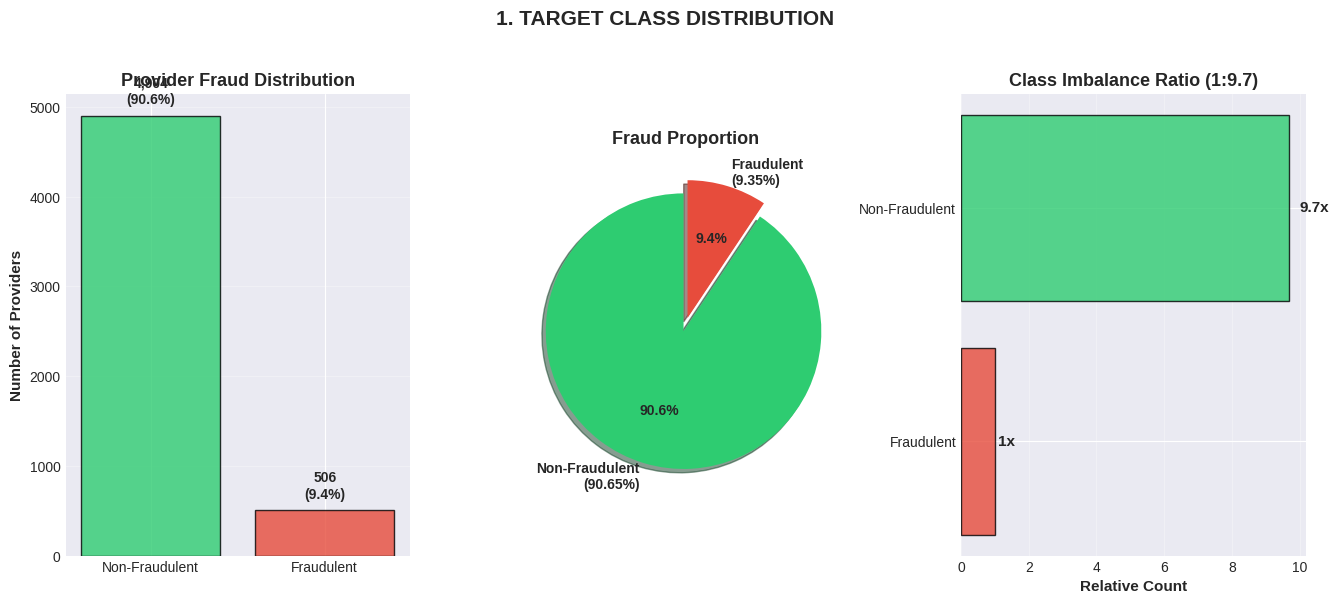

✓ Target class distribution visualized

2. Claim Amount Trends
--------------------------------------------------------------------------------


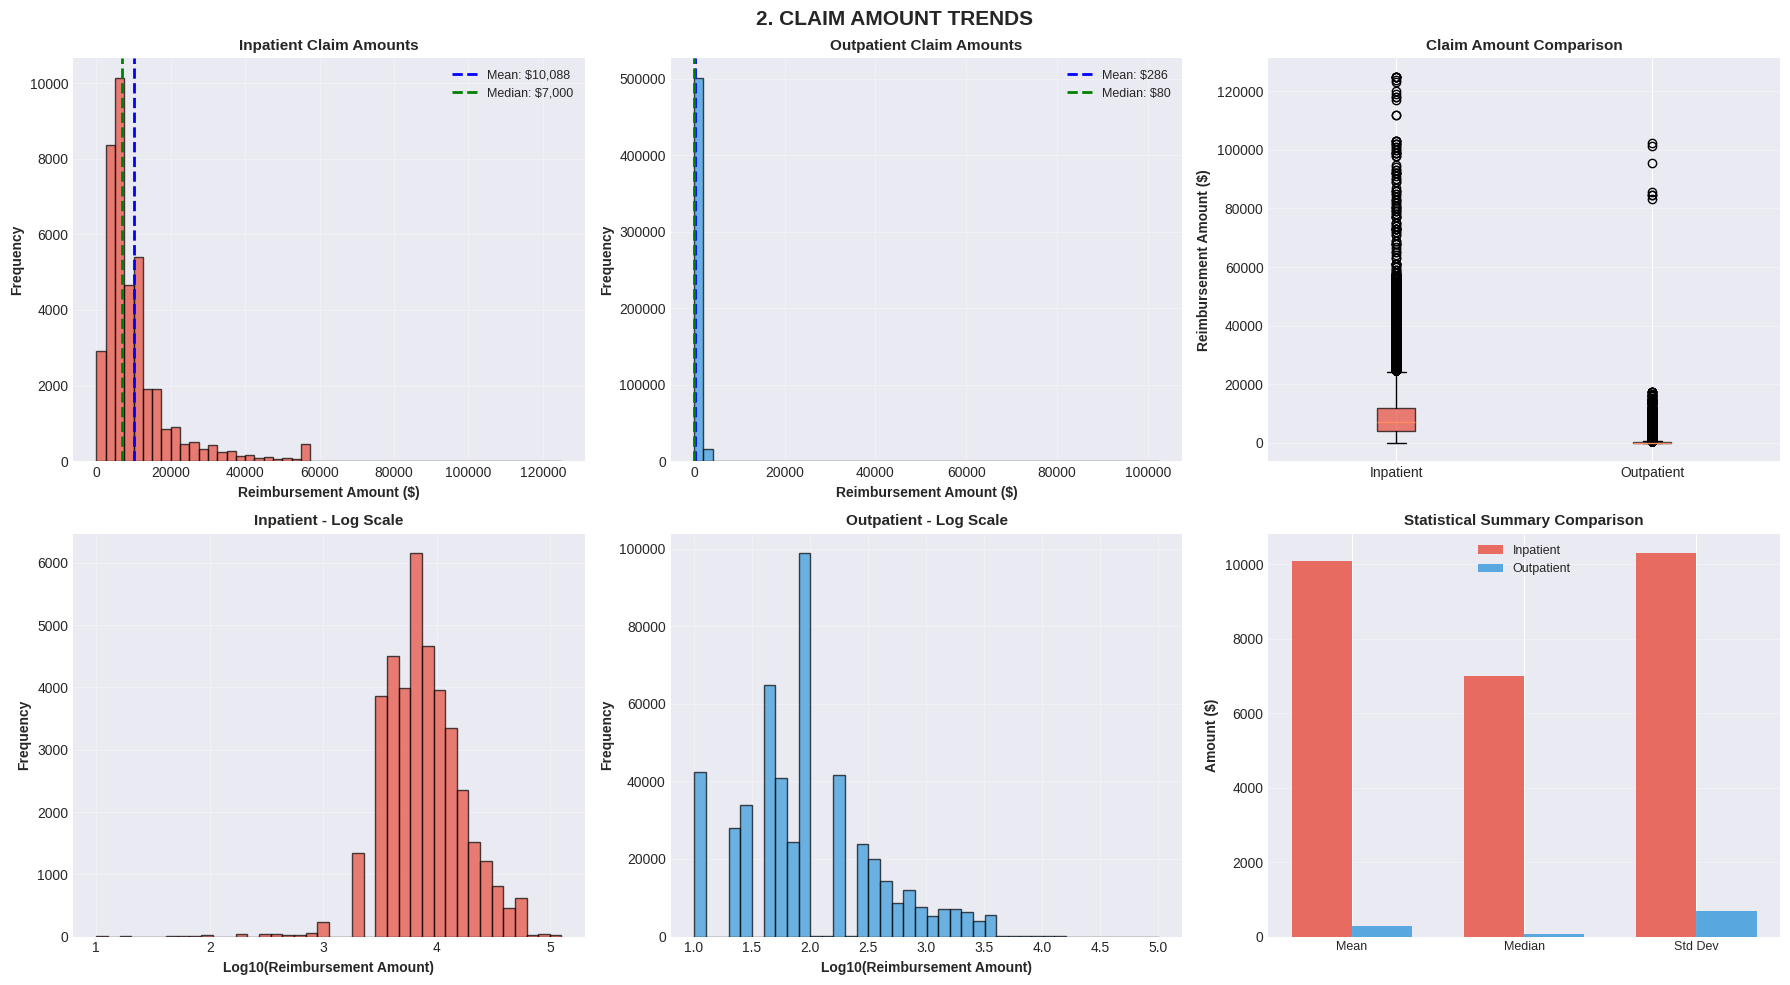

✓ Claim amount trends visualized

3. Provider-Level Summaries
--------------------------------------------------------------------------------


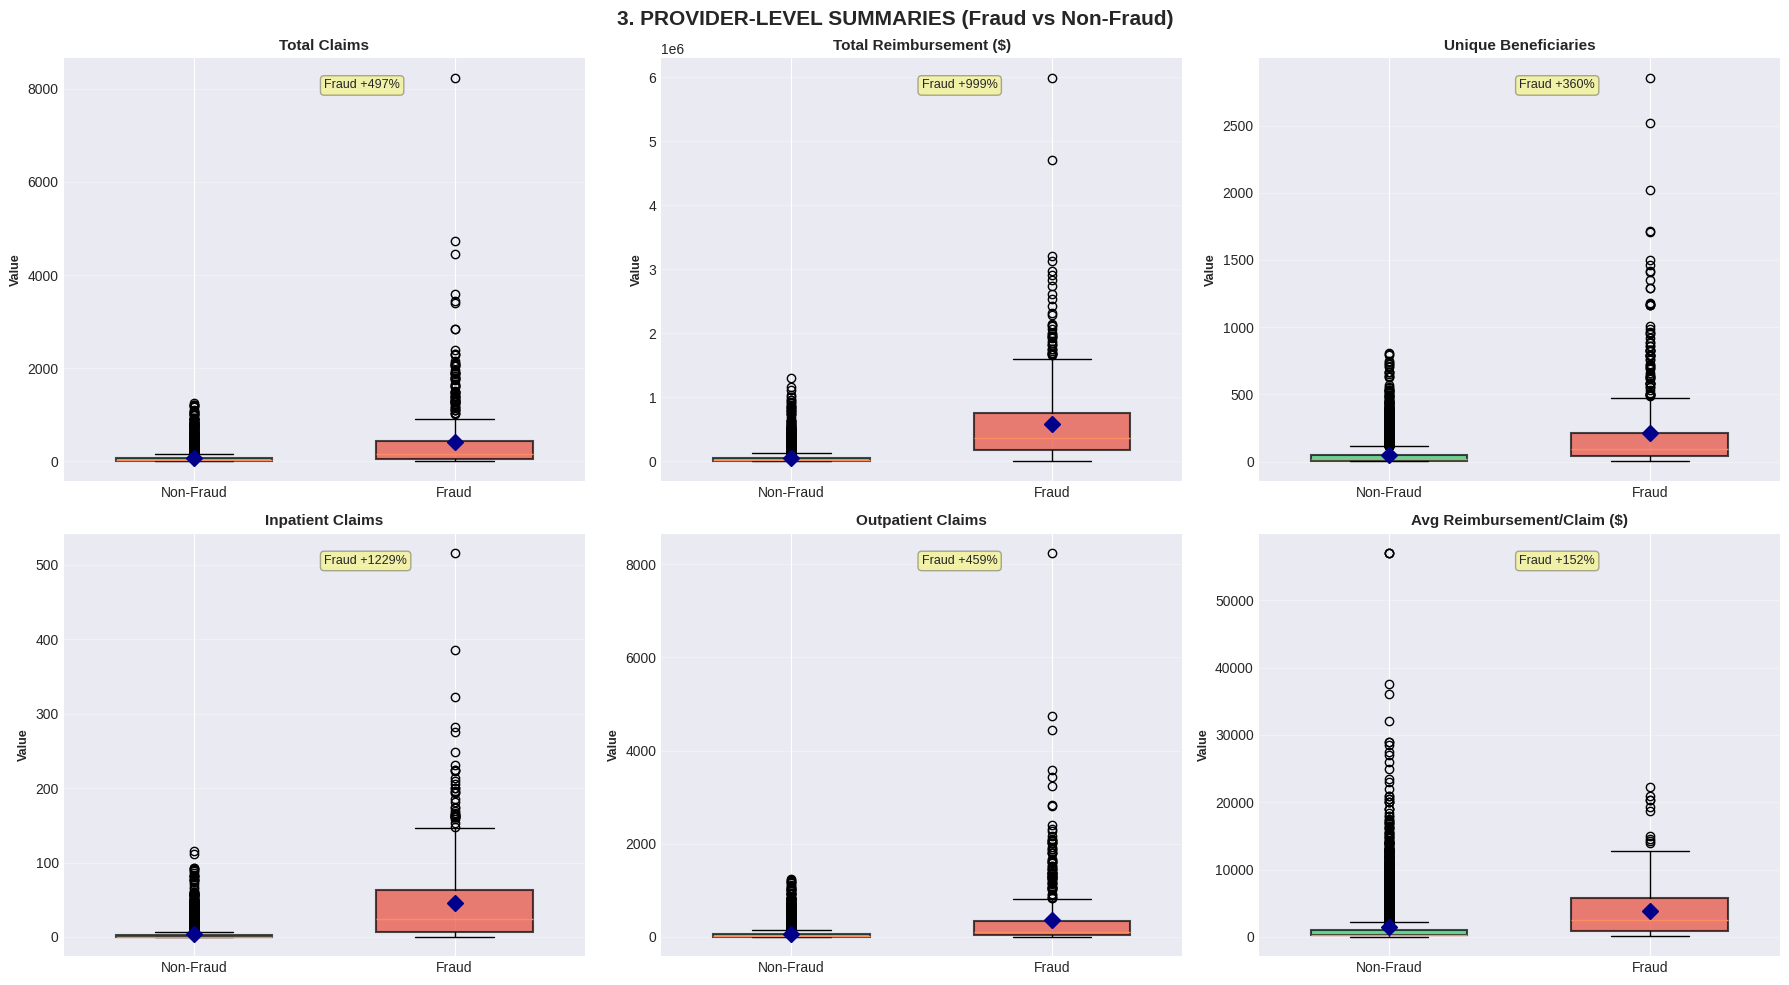

✓ Provider-level summaries visualized

4. Correlation Heatmap
--------------------------------------------------------------------------------


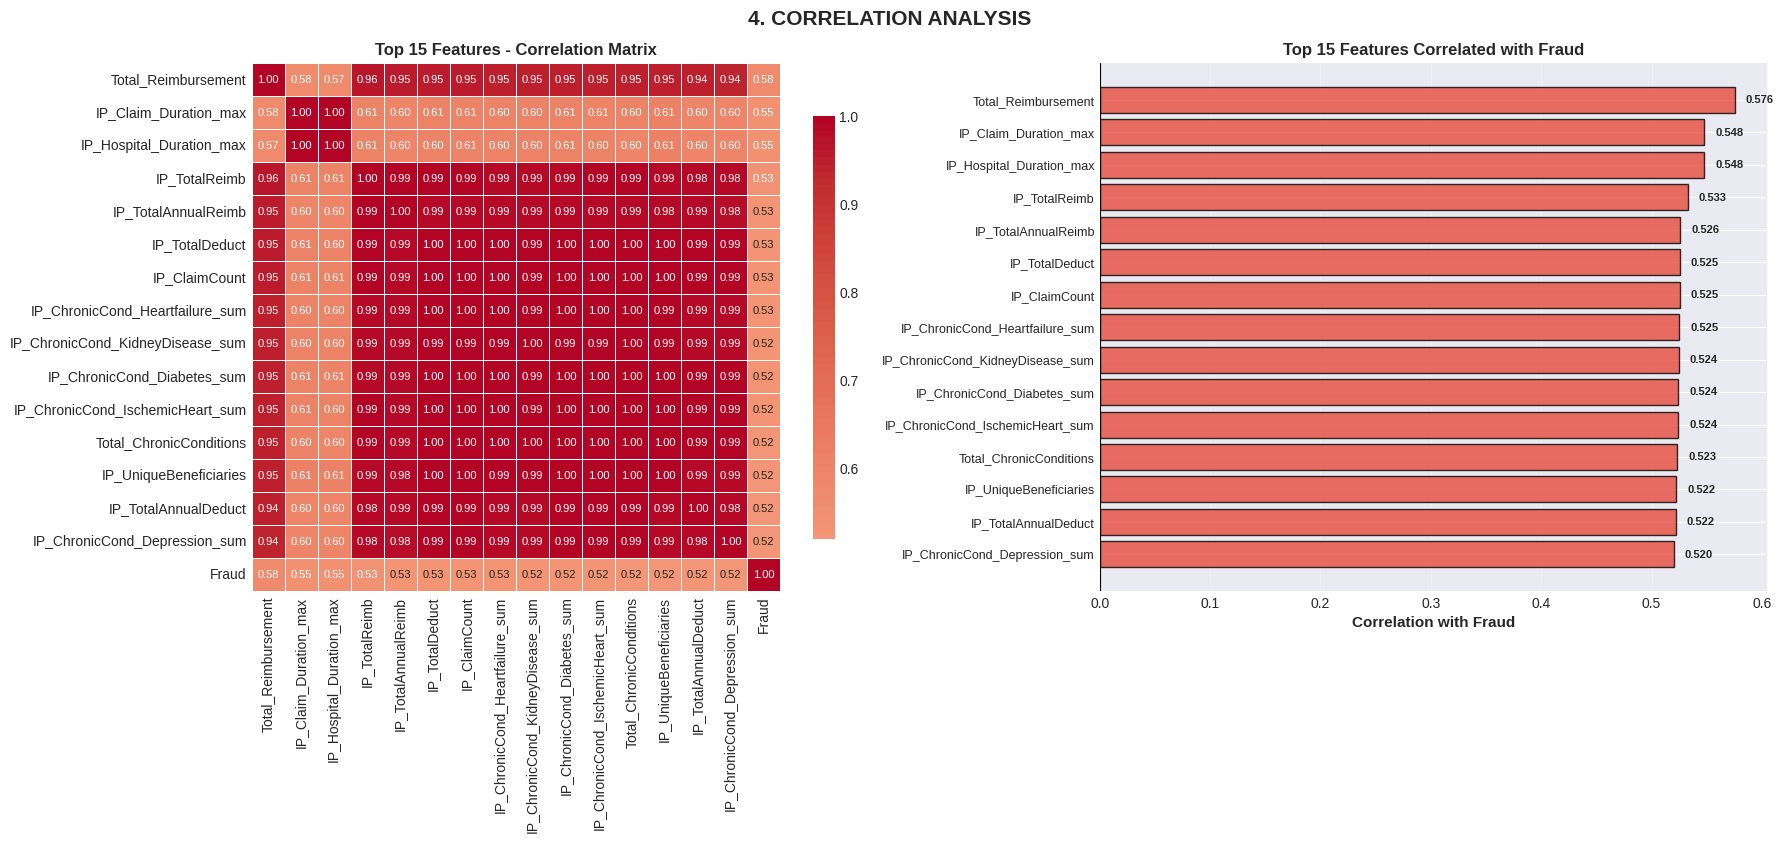

✓ Correlation heatmap visualized

5. Geographic Patterns
--------------------------------------------------------------------------------


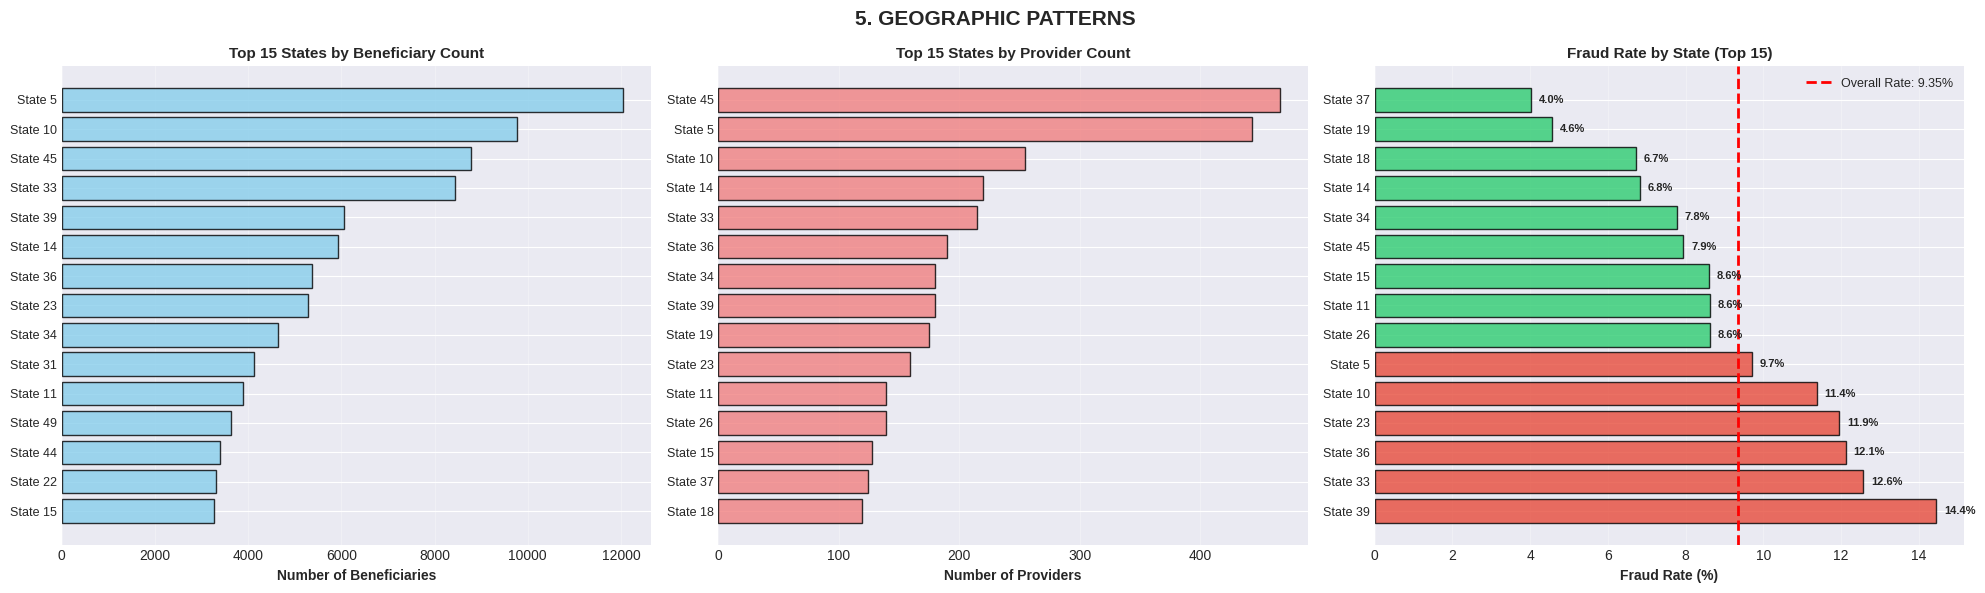

✓ Geographic patterns visualized

6. Temporal Patterns
--------------------------------------------------------------------------------


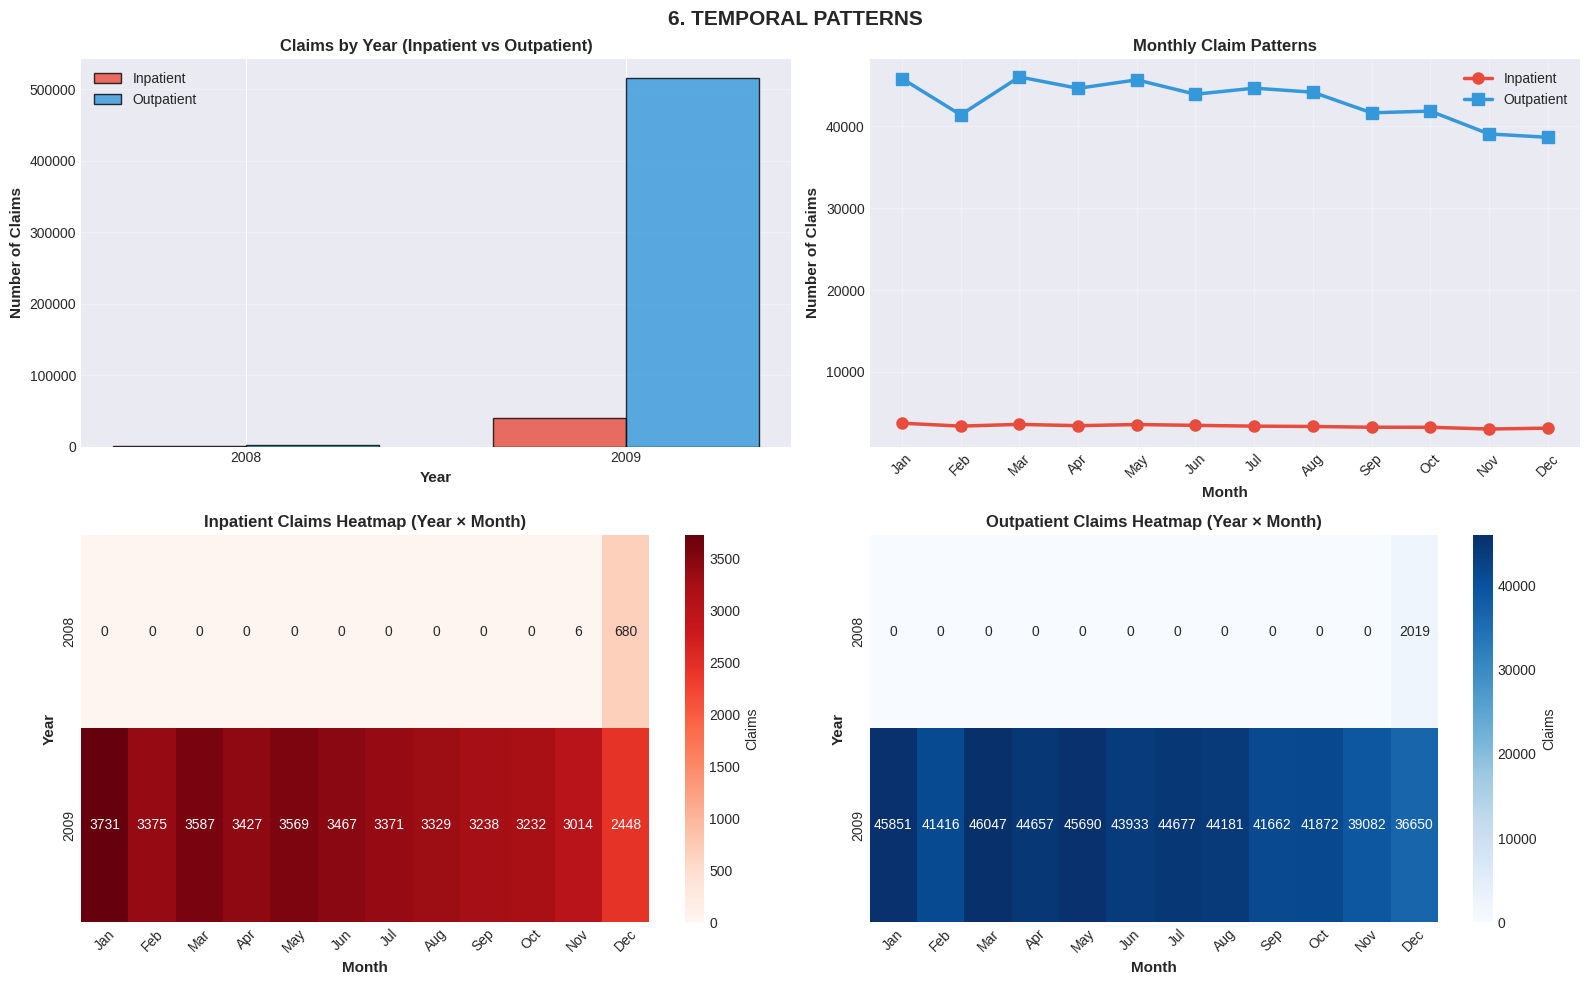

✓ Temporal patterns visualized

7. Fraud vs Non-Fraud Monthly Claim Trends 
--------------------------------------------------------------------------------


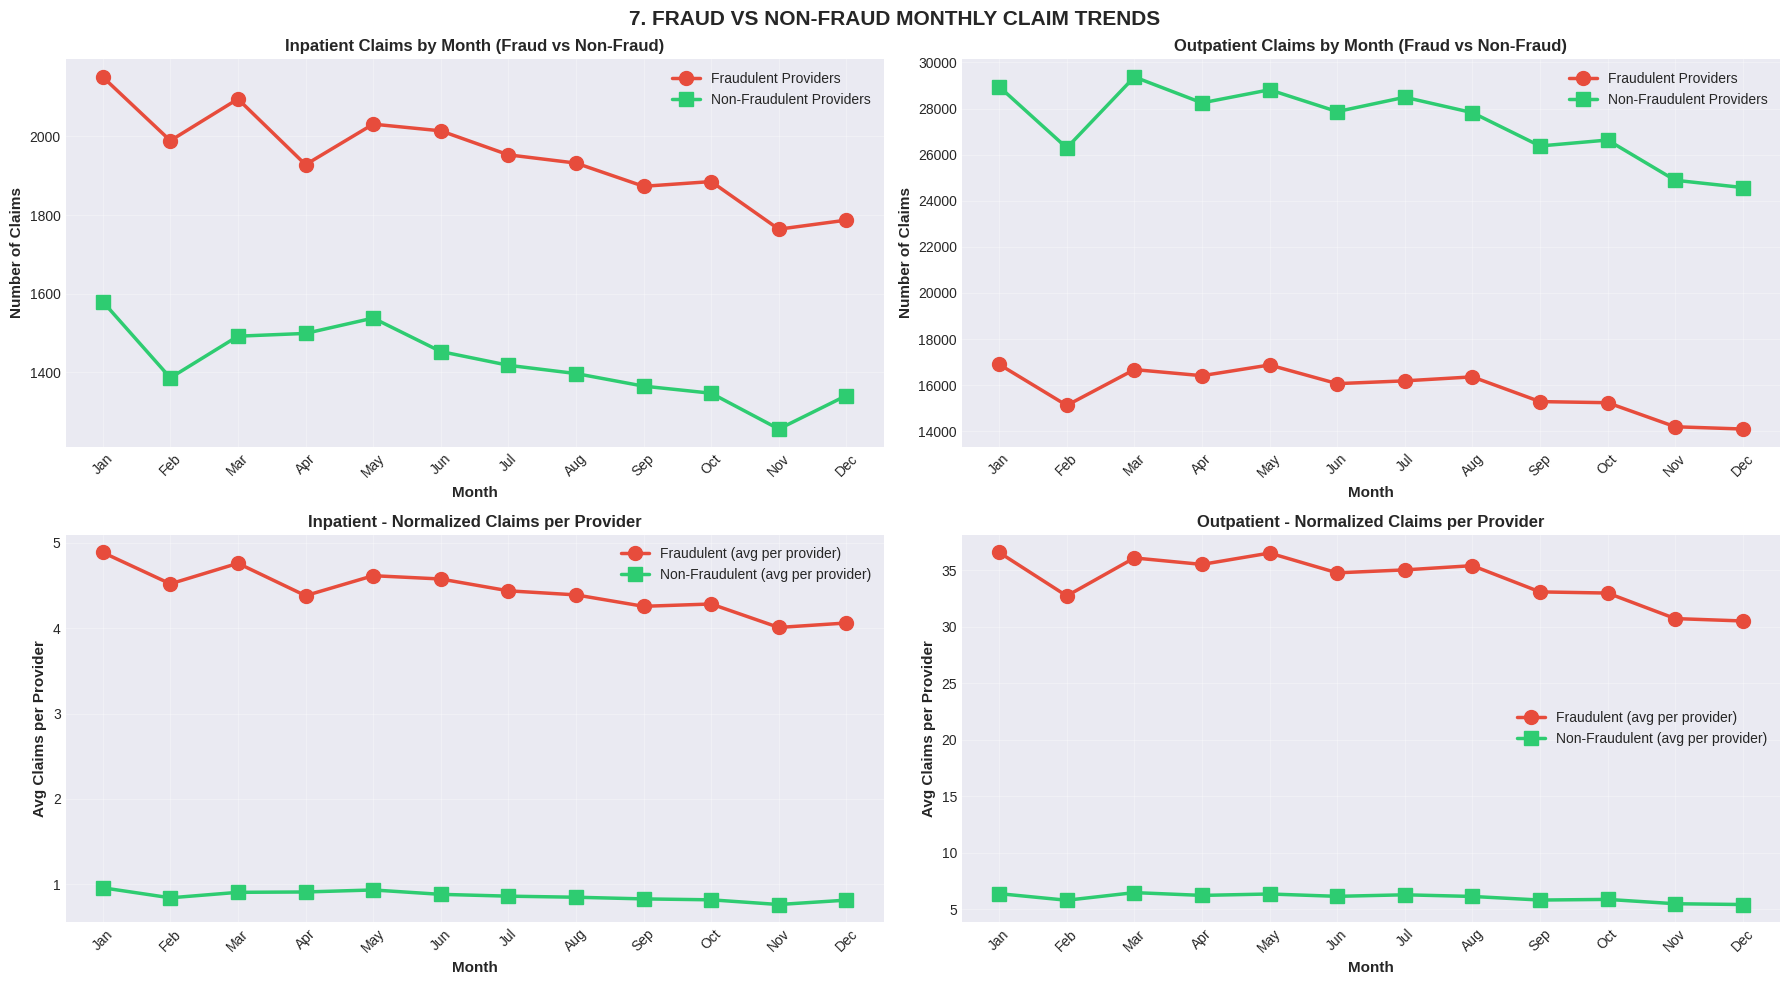

✓ Fraud vs Non-Fraud monthly trends visualized



In [ ]:
# ============================================================================
# Part 12: Core Visualizations Summary - All Required Plots
# ============================================================================

print("\n" + "="*80)
print("COMPREHENSIVE VISUALIZATION SUMMARY")
print("All Core Required Plots")
print("="*80)
print("\n")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

print("Generating comprehensive visualization dashboard...")
print()

# ============================================================================
# FIGURE 1: TARGET CLASS DISTRIBUTION
# ============================================================================

print("1. Target Class Distribution")
print("-"*80)

fig1 = plt.figure(figsize=(16, 6))
gs1 = GridSpec(1, 3, figure=fig1, wspace=0.3)

# Fraud distribution - Bar chart
ax1 = fig1.add_subplot(gs1[0, 0])
fraud_counts = labels_df['PotentialFraud'].value_counts()
fraud_percentages = fraud_counts / fraud_counts.sum() * 100
colors_fraud = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['Non-Fraudulent', 'Fraudulent'], fraud_counts.values, color=colors_fraud, alpha=0.8, edgecolor='black')
ax1.set_ylabel('Number of Providers', fontsize=11, fontweight='bold')
ax1.set_title('Provider Fraud Distribution', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for i, (bar, count, pct) in enumerate(zip(bars, fraud_counts.values, fraud_percentages.values)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Fraud distribution - Pie chart
ax2 = fig1.add_subplot(gs1[0, 1])
explode = (0.05, 0.05)
ax2.pie(fraud_counts.values, labels=['Non-Fraudulent\n(90.65%)', 'Fraudulent\n(9.35%)'],
        autopct='%1.1f%%', startangle=90, colors=colors_fraud, explode=explode,
        textprops={'fontsize': 10, 'fontweight': 'bold'}, shadow=True)
ax2.set_title('Fraud Proportion', fontsize=13, fontweight='bold')

# Class imbalance visualization
ax3 = fig1.add_subplot(gs1[0, 2])
imbalance_ratio = fraud_counts['No'] / fraud_counts['Yes']
ax3.barh(['Fraudulent', 'Non-Fraudulent'], [1, imbalance_ratio], color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
ax3.set_xlabel('Relative Count', fontsize=11, fontweight='bold')
ax3.set_title('Class Imbalance Ratio (1:9.7)', fontsize=13, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
ax3.text(imbalance_ratio + 0.3, 1, f'{imbalance_ratio:.1f}x', va='center', fontsize=11, fontweight='bold')
ax3.text(1 + 0.1, 0, '1x', va='center', fontsize=11, fontweight='bold')

plt.suptitle('1. TARGET CLASS DISTRIBUTION', fontsize=15, fontweight='bold', y=1.02)
plt.show()

print("✓ Target class distribution visualized")
print()

# ============================================================================
# FIGURE 2: CLAIM AMOUNT TRENDS
# ============================================================================

print("2. Claim Amount Trends")
print("-"*80)

fig2, axes = plt.subplots(2, 3, figsize=(18, 10))

# Inpatient amount distribution
ax1 = axes[0, 0]
ip_reimb = inpatient_df['InscClaimAmtReimbursed'].dropna()
ax1.hist(ip_reimb, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
ax1.axvline(ip_reimb.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: ${ip_reimb.mean():,.0f}')
ax1.axvline(ip_reimb.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${ip_reimb.median():,.0f}')
ax1.set_xlabel('Reimbursement Amount ($)', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax1.set_title('Inpatient Claim Amounts', fontsize=11, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# Outpatient amount distribution
ax2 = axes[0, 1]
op_reimb = outpatient_df['InscClaimAmtReimbursed'].dropna()
ax2.hist(op_reimb, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
ax2.axvline(op_reimb.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: ${op_reimb.mean():,.0f}')
ax2.axvline(op_reimb.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${op_reimb.median():,.0f}')
ax2.set_xlabel('Reimbursement Amount ($)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax2.set_title('Outpatient Claim Amounts', fontsize=11, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(alpha=0.3)

# Comparison boxplot
ax3 = axes[0, 2]
data_to_plot = [ip_reimb.values, op_reimb.values]
bp = ax3.boxplot(data_to_plot, labels=['Inpatient', 'Outpatient'], patch_artist=True)
colors_box = ['#e74c3c', '#3498db']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
ax3.set_ylabel('Reimbursement Amount ($)', fontsize=10, fontweight='bold')
ax3.set_title('Claim Amount Comparison', fontsize=11, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

# Log-scale distributions
ax4 = axes[1, 0]
ip_reimb_positive = ip_reimb[ip_reimb > 0]
ax4.hist(np.log10(ip_reimb_positive), bins=40, color='#e74c3c', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Log10(Reimbursement Amount)', fontsize=10, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax4.set_title('Inpatient - Log Scale', fontsize=11, fontweight='bold')
ax4.grid(alpha=0.3)

ax5 = axes[1, 1]
op_reimb_positive = op_reimb[op_reimb > 0]
ax5.hist(np.log10(op_reimb_positive), bins=40, color='#3498db', edgecolor='black', alpha=0.7)
ax5.set_xlabel('Log10(Reimbursement Amount)', fontsize=10, fontweight='bold')
ax5.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax5.set_title('Outpatient - Log Scale', fontsize=11, fontweight='bold')
ax5.grid(alpha=0.3)

# Summary statistics comparison
ax6 = axes[1, 2]
stats_data = pd.DataFrame({
    'Inpatient': [ip_reimb.mean(), ip_reimb.median(), ip_reimb.std()],
    'Outpatient': [op_reimb.mean(), op_reimb.median(), op_reimb.std()]
}, index=['Mean', 'Median', 'Std Dev'])

x_pos = np.arange(len(stats_data.index))
width = 0.35
bars1 = ax6.bar(x_pos - width/2, stats_data['Inpatient'], width, label='Inpatient', color='#e74c3c', alpha=0.8)
bars2 = ax6.bar(x_pos + width/2, stats_data['Outpatient'], width, label='Outpatient', color='#3498db', alpha=0.8)
ax6.set_ylabel('Amount ($)', fontsize=10, fontweight='bold')
ax6.set_title('Statistical Summary Comparison', fontsize=11, fontweight='bold')
ax6.set_xticks(x_pos)
ax6.set_xticklabels(stats_data.index, fontsize=9)
ax6.legend(fontsize=9)
ax6.grid(axis='y', alpha=0.3)

plt.suptitle('2. CLAIM AMOUNT TRENDS', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Claim amount trends visualized")
print()

# ============================================================================
# FIGURE 3: PROVIDER-LEVEL SUMMARIES (FRAUD VS NON-FRAUD)
# ============================================================================

print("3. Provider-Level Summaries")
print("-"*80)

# Prepare provider-level data
inpatient_labeled = inpatient_df.merge(labels_df, on='Provider', how='inner')
outpatient_labeled = outpatient_df.merge(labels_df, on='Provider', how='inner')

ip_agg = inpatient_labeled.groupby(['Provider', 'PotentialFraud']).agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': lambda x: x.sum(),
    'BeneID': 'nunique'
}).reset_index()
ip_agg.columns = ['Provider', 'PotentialFraud', 'IP_ClaimCount', 'IP_TotalReimb', 'IP_UniqueBene']

op_agg = outpatient_labeled.groupby(['Provider', 'PotentialFraud']).agg({
    'ClaimID': 'count',
    'InscClaimAmtReimbursed': lambda x: x.sum(),
    'BeneID': 'nunique'
}).reset_index()
op_agg.columns = ['Provider', 'PotentialFraud', 'OP_ClaimCount', 'OP_TotalReimb', 'OP_UniqueBene']

provider_comparison = pd.merge(ip_agg, op_agg, on=['Provider', 'PotentialFraud'], how='outer').fillna(0)
provider_comparison['Total_ClaimCount'] = provider_comparison['IP_ClaimCount'] + provider_comparison['OP_ClaimCount']
provider_comparison['Total_Reimbursement'] = provider_comparison['IP_TotalReimb'] + provider_comparison['OP_TotalReimb']
provider_comparison['Total_UniqueBene'] = provider_comparison[['IP_UniqueBene', 'OP_UniqueBene']].max(axis=1)
provider_comparison['Avg_Reimb_Per_Claim'] = provider_comparison['Total_Reimbursement'] / provider_comparison['Total_ClaimCount']

fraud_providers = provider_comparison[provider_comparison['PotentialFraud'] == 'Yes']
non_fraud_providers = provider_comparison[provider_comparison['PotentialFraud'] == 'No']

fig3, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

metrics_to_plot = [
    ('Total_ClaimCount', 'Total Claims'),
    ('Total_Reimbursement', 'Total Reimbursement ($)'),
    ('Total_UniqueBene', 'Unique Beneficiaries'),
    ('IP_ClaimCount', 'Inpatient Claims'),
    ('OP_ClaimCount', 'Outpatient Claims'),
    ('Avg_Reimb_Per_Claim', 'Avg Reimbursement/Claim ($)')
]

for idx, (col, title) in enumerate(metrics_to_plot):
    ax = axes[idx]

    data_to_plot = [
        non_fraud_providers[col].values,
        fraud_providers[col].values
    ]

    bp = ax.boxplot(data_to_plot, labels=['Non-Fraud', 'Fraud'], patch_artist=True, widths=0.6)

    colors = ['#2ecc71', '#e74c3c']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.5)

    # Add mean markers
    means = [non_fraud_providers[col].mean(), fraud_providers[col].mean()]
    ax.plot([1, 2], means, 'D', color='darkblue', markersize=8, label='Mean', zorder=3)

    ax.set_title(title, fontsize=11, fontweight='bold')
    ax.set_ylabel('Value', fontsize=9, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

    # Add percentage difference
    diff_pct = ((means[1] - means[0]) / means[0] * 100) if means[0] != 0 else 0
    ax.text(0.5, 0.95, f'Fraud +{diff_pct:.0f}%', transform=ax.transAxes,
            fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.suptitle('3. PROVIDER-LEVEL SUMMARIES (Fraud vs Non-Fraud)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Provider-level summaries visualized")
print()

# ============================================================================
# FIGURE 4: CORRELATION HEATMAP
# ============================================================================

print("4. Correlation Heatmap")
print("-"*80)

# Load processed data
df_features = pd.read_csv('provider_features.csv')

# Select numerical features
numerical_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['Fraud']]

# Calculate correlation with fraud
corr_matrix = df_features[numerical_cols + ['Fraud']].corr()
fraud_corr = corr_matrix['Fraud'].drop('Fraud').sort_values(ascending=False, key=abs)

# Select top features for visualization
top_features = fraud_corr.head(15).index.tolist()
corr_subset = df_features[top_features + ['Fraud']].corr()

fig4, axes = plt.subplots(1, 2, figsize=(18, 8))

# Full correlation heatmap (top features)
ax1 = axes[0]
sns.heatmap(corr_subset, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax1,
            annot_kws={'fontsize': 8})
ax1.set_title('Top 15 Features - Correlation Matrix', fontsize=12, fontweight='bold')

# Fraud correlation bar plot
ax2 = axes[1]
fraud_corr_top = fraud_corr.head(15)
colors_corr = ['#e74c3c' if x > 0 else '#3498db' for x in fraud_corr_top.values]
bars = ax2.barh(range(len(fraud_corr_top)), fraud_corr_top.values, color=colors_corr, alpha=0.8, edgecolor='black')
ax2.set_yticks(range(len(fraud_corr_top)))
ax2.set_yticklabels(fraud_corr_top.index, fontsize=9)
ax2.set_xlabel('Correlation with Fraud', fontsize=11, fontweight='bold')
ax2.set_title('Top 15 Features Correlated with Fraud', fontsize=12, fontweight='bold')
ax2.axvline(0, color='black', linewidth=0.8)
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

# Add values on bars
for i, (bar, val) in enumerate(zip(bars, fraud_corr_top.values)):
    ax2.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}',
             va='center', ha='left' if val > 0 else 'right', fontsize=8, fontweight='bold')

plt.suptitle('4. CORRELATION ANALYSIS', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap visualized")
print()

# ============================================================================
# FIGURE 5: GEOGRAPHIC PATTERNS
# ============================================================================

print("5. Geographic Patterns")
print("-"*80)

# Get state information
beneficiary_state = beneficiary_df[['BeneID', 'State']].copy()

# Provider primary states
ip_with_state = inpatient_df.merge(beneficiary_state, on='BeneID', how='left')
ip_provider_states = ip_with_state.groupby('Provider')['State'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])

op_with_state = outpatient_df.merge(beneficiary_state, on='BeneID', how='left')
op_provider_states = op_with_state.groupby('Provider')['State'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0])

provider_states = pd.concat([ip_provider_states, op_provider_states]).groupby(level=0).first()
provider_states_df = provider_states.reset_index()
provider_states_df.columns = ['Provider', 'Primary_State']

# Merge with labels
geo_fraud = labels_df.merge(provider_states_df, on='Provider', how='left')

fraud_by_state = geo_fraud.groupby(['Primary_State', 'PotentialFraud']).size().unstack(fill_value=0)
fraud_by_state['Total'] = fraud_by_state.sum(axis=1)
fraud_by_state['Fraud_Rate_%'] = (fraud_by_state.get('Yes', 0) / fraud_by_state['Total'] * 100).round(2)
fraud_by_state = fraud_by_state.sort_values('Total', ascending=False).head(15)

fig5, axes = plt.subplots(1, 3, figsize=(20, 6))

# Beneficiary distribution by state
ax1 = axes[0]
top_states_bene = beneficiary_df['State'].value_counts().head(15)
bars = ax1.barh(range(len(top_states_bene)), top_states_bene.values, color='skyblue', edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_states_bene)))
ax1.set_yticklabels([f'State {s}' for s in top_states_bene.index], fontsize=9)
ax1.set_xlabel('Number of Beneficiaries', fontsize=10, fontweight='bold')
ax1.set_title('Top 15 States by Beneficiary Count', fontsize=11, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Provider distribution by state
ax2 = axes[1]
top_states_prov = fraud_by_state['Total'].head(15)
bars = ax2.barh(range(len(top_states_prov)), top_states_prov.values, color='lightcoral', edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(top_states_prov)))
ax2.set_yticklabels([f'State {int(s)}' for s in top_states_prov.index], fontsize=9)
ax2.set_xlabel('Number of Providers', fontsize=10, fontweight='bold')
ax2.set_title('Top 15 States by Provider Count', fontsize=11, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Fraud rate by state
ax3 = axes[2]
fraud_rate_plot = fraud_by_state['Fraud_Rate_%'].head(15).sort_values(ascending=True)
colors_geo = ['#e74c3c' if x > 9.35 else '#2ecc71' for x in fraud_rate_plot.values]
bars = ax3.barh(range(len(fraud_rate_plot)), fraud_rate_plot.values, color=colors_geo, edgecolor='black', alpha=0.8)
ax3.set_yticks(range(len(fraud_rate_plot)))
ax3.set_yticklabels([f'State {int(s)}' for s in fraud_rate_plot.index], fontsize=9)
ax3.set_xlabel('Fraud Rate (%)', fontsize=10, fontweight='bold')
ax3.set_title('Fraud Rate by State (Top 15)', fontsize=11, fontweight='bold')
ax3.axvline(9.35, color='red', linestyle='--', linewidth=2, label='Overall Rate: 9.35%')
ax3.legend(fontsize=9)
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

# Add values on bars
for i, (bar, val) in enumerate(zip(bars, fraud_rate_plot.values)):
    ax3.text(val + 0.2, i, f'{val:.1f}%', va='center', fontsize=8, fontweight='bold')

plt.suptitle('5. GEOGRAPHIC PATTERNS', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Geographic patterns visualized")
print()

# ============================================================================
# FIGURE 6: TEMPORAL PATTERNS
# ============================================================================

print("6. Temporal Patterns")
print("-"*80)

# Ensure dates are datetime
inpatient_df['ClaimStartDt'] = pd.to_datetime(inpatient_df['ClaimStartDt'])
outpatient_df['ClaimStartDt'] = pd.to_datetime(outpatient_df['ClaimStartDt'])

inpatient_df['Claim_Year'] = inpatient_df['ClaimStartDt'].dt.year
inpatient_df['Claim_Month'] = inpatient_df['ClaimStartDt'].dt.month
outpatient_df['Claim_Year'] = outpatient_df['ClaimStartDt'].dt.year
outpatient_df['Claim_Month'] = outpatient_df['ClaimStartDt'].dt.month

fig6, axes = plt.subplots(2, 2, figsize=(16, 10))

# Claims by year
ax1 = axes[0, 0]
ip_yearly = inpatient_df['Claim_Year'].value_counts().sort_index()
op_yearly = outpatient_df['Claim_Year'].value_counts().sort_index()

x_years = ip_yearly.index
width = 0.35
x_pos = np.arange(len(x_years))

bars1 = ax1.bar(x_pos - width/2, ip_yearly.values, width, label='Inpatient', color='#e74c3c', alpha=0.8, edgecolor='black')
bars2 = ax1.bar(x_pos + width/2, op_yearly.values, width, label='Outpatient', color='#3498db', alpha=0.8, edgecolor='black')

ax1.set_xlabel('Year', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Claims', fontsize=11, fontweight='bold')
ax1.set_title('Claims by Year (Inpatient vs Outpatient)', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(x_years)
ax1.legend(fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Monthly patterns - Line plot
ax2 = axes[0, 1]
ip_monthly = inpatient_df['Claim_Month'].value_counts().sort_index()
op_monthly = outpatient_df['Claim_Month'].value_counts().sort_index()

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months = range(1, 13)

ax2.plot(months, [ip_monthly.get(i, 0) for i in months],
         marker='o', linewidth=2.5, markersize=8, color='#e74c3c', label='Inpatient')
ax2.plot(months, [op_monthly.get(i, 0) for i in months],
         marker='s', linewidth=2.5, markersize=8, color='#3498db', label='Outpatient')
ax2.set_xticks(months)
ax2.set_xticklabels(month_names, rotation=45)
ax2.set_xlabel('Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Claims', fontsize=11, fontweight='bold')
ax2.set_title('Monthly Claim Patterns', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Heatmap - Claims by month and year (Inpatient)
ax3 = axes[1, 0]
ip_month_year = inpatient_df.groupby(['Claim_Year', 'Claim_Month']).size().unstack(fill_value=0)
sns.heatmap(ip_month_year, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Claims'}, ax=ax3)
ax3.set_xlabel('Month', fontsize=11, fontweight='bold')
ax3.set_ylabel('Year', fontsize=11, fontweight='bold')
ax3.set_title('Inpatient Claims Heatmap (Year × Month)', fontsize=12, fontweight='bold')
ax3.set_xticklabels(month_names, rotation=45)

# Heatmap - Claims by month and year (Outpatient)
ax4 = axes[1, 1]
op_month_year = outpatient_df.groupby(['Claim_Year', 'Claim_Month']).size().unstack(fill_value=0)
sns.heatmap(op_month_year, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Claims'}, ax=ax4)
ax4.set_xlabel('Month', fontsize=11, fontweight='bold')
ax4.set_ylabel('Year', fontsize=11, fontweight='bold')
ax4.set_title('Outpatient Claims Heatmap (Year × Month)', fontsize=12, fontweight='bold')
ax4.set_xticklabels(month_names, rotation=45)

plt.suptitle('6. TEMPORAL PATTERNS', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Temporal patterns visualized")
print()

# ============================================================================
# FIGURE 7: FRAUD VS NON-FRAUD MONTHLY CLAIM TRENDS
# ============================================================================

print("7. Fraud vs Non-Fraud Monthly Claim Trends ")
print("-"*80)

# Merge claims with fraud labels
inpatient_fraud = inpatient_df.merge(labels_df, on='Provider', how='inner')
outpatient_fraud = outpatient_df.merge(labels_df, on='Provider', how='inner')

# Calculate monthly patterns by fraud status
ip_fraud_monthly = inpatient_fraud[inpatient_fraud['PotentialFraud'] == 'Yes'].groupby('Claim_Month').size()
ip_nonfraud_monthly = inpatient_fraud[inpatient_fraud['PotentialFraud'] == 'No'].groupby('Claim_Month').size()

op_fraud_monthly = outpatient_fraud[outpatient_fraud['PotentialFraud'] == 'Yes'].groupby('Claim_Month').size()
op_nonfraud_monthly = outpatient_fraud[outpatient_fraud['PotentialFraud'] == 'No'].groupby('Claim_Month').size()

fig7, axes = plt.subplots(2, 2, figsize=(18, 10))

# Inpatient - Absolute numbers
ax1 = axes[0, 0]
months = range(1, 13)
fraud_ip = [ip_fraud_monthly.get(i, 0) for i in months]
nonfraud_ip = [ip_nonfraud_monthly.get(i, 0) for i in months]

ax1.plot(months, fraud_ip, marker='o', linewidth=2.5, markersize=10,
         color='#e74c3c', label='Fraudulent Providers', linestyle='-')
ax1.plot(months, nonfraud_ip, marker='s', linewidth=2.5, markersize=10,
         color='#2ecc71', label='Non-Fraudulent Providers', linestyle='-')
ax1.set_xticks(months)
ax1.set_xticklabels(month_names, rotation=45)
ax1.set_xlabel('Month', fontsize=11, fontweight='bold')
ax1.set_ylabel('Number of Claims', fontsize=11, fontweight='bold')
ax1.set_title('Inpatient Claims by Month (Fraud vs Non-Fraud)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Outpatient - Absolute numbers
ax2 = axes[0, 1]
fraud_op = [op_fraud_monthly.get(i, 0) for i in months]
nonfraud_op = [op_nonfraud_monthly.get(i, 0) for i in months]

ax2.plot(months, fraud_op, marker='o', linewidth=2.5, markersize=10,
         color='#e74c3c', label='Fraudulent Providers', linestyle='-')
ax2.plot(months, nonfraud_op, marker='s', linewidth=2.5, markersize=10,
         color='#2ecc71', label='Non-Fraudulent Providers', linestyle='-')
ax2.set_xticks(months)
ax2.set_xticklabels(month_names, rotation=45)
ax2.set_xlabel('Month', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Claims', fontsize=11, fontweight='bold')
ax2.set_title('Outpatient Claims by Month (Fraud vs Non-Fraud)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Inpatient - Normalized (per provider)
ax3 = axes[1, 0]
n_fraud_providers_ip = inpatient_fraud[inpatient_fraud['PotentialFraud'] == 'Yes']['Provider'].nunique()
n_nonfraud_providers_ip = inpatient_fraud[inpatient_fraud['PotentialFraud'] == 'No']['Provider'].nunique()

fraud_ip_norm = [x / n_fraud_providers_ip for x in fraud_ip]
nonfraud_ip_norm = [x / n_nonfraud_providers_ip for x in nonfraud_ip]

ax3.plot(months, fraud_ip_norm, marker='o', linewidth=2.5, markersize=10,
         color='#e74c3c', label='Fraudulent (avg per provider)', linestyle='-')
ax3.plot(months, nonfraud_ip_norm, marker='s', linewidth=2.5, markersize=10,
         color='#2ecc71', label='Non-Fraudulent (avg per provider)', linestyle='-')
ax3.set_xticks(months)
ax3.set_xticklabels(month_names, rotation=45)
ax3.set_xlabel('Month', fontsize=11, fontweight='bold')
ax3.set_ylabel('Avg Claims per Provider', fontsize=11, fontweight='bold')
ax3.set_title('Inpatient - Normalized Claims per Provider', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Outpatient - Normalized (per provider)
ax4 = axes[1, 1]
n_fraud_providers_op = outpatient_fraud[outpatient_fraud['PotentialFraud'] == 'Yes']['Provider'].nunique()
n_nonfraud_providers_op = outpatient_fraud[outpatient_fraud['PotentialFraud'] == 'No']['Provider'].nunique()

fraud_op_norm = [x / n_fraud_providers_op for x in fraud_op]
nonfraud_op_norm = [x / n_nonfraud_providers_op for x in nonfraud_op]

ax4.plot(months, fraud_op_norm, marker='o', linewidth=2.5, markersize=10,
         color='#e74c3c', label='Fraudulent (avg per provider)', linestyle='-')
ax4.plot(months, nonfraud_op_norm, marker='s', linewidth=2.5, markersize=10,
         color='#2ecc71', label='Non-Fraudulent (avg per provider)', linestyle='-')
ax4.set_xticks(months)
ax4.set_xticklabels(month_names, rotation=45)
ax4.set_xlabel('Month', fontsize=11, fontweight='bold')
ax4.set_ylabel('Avg Claims per Provider', fontsize=11, fontweight='bold')
ax4.set_title('Outpatient - Normalized Claims per Provider', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.suptitle('7. FRAUD VS NON-FRAUD MONTHLY CLAIM TRENDS', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Fraud vs Non-Fraud monthly trends visualized")
print()

